<a href="https://colab.research.google.com/github/hqiangtw/pandas/blob/master/cal_canal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 导入模块

In [5]:
import sys
sys.path.append(r'C:\Users\HQ\Code\canal')
import write2excel as w2xl
import ZdmRelatedProcessing as zdm
import DataProcessing as dp
from CanalV import CalQuantity

# import tkinter
# import tkinter.messagebox

# help(zdm)
# help(dp)
# help(w2xl)

ModuleNotFoundError: ignored

## 工程量计算

### 读取建筑物信息表

In [ ]:
import pandas as pd
flow_segments = pd.read_excel(goal_file_name,'流量分段',index_col = None , header = [0])
flow_segments.index = range(1, len(flow_segments)+1)
channel = pd.read_excel(goal_file_name,'明渠统计表',index_col = None , header = [0])
tunnel =  pd.read_excel(goal_file_name,'隧洞统计表',index_col = None , header = [0])
aqueduct =  pd.read_excel(goal_file_name,'渡槽统计表',index_col = None , header = [0])
canal_structure_len_table =  pd.read_excel(goal_file_name,'渠系建筑物统计表',index_col = None , header = [0])
hollow_pier_support = pd.read_excel(goal_file_name,'空心墩支撑高度表',index_col = [0,1] , header = [0])
double_pier_support = pd.read_excel(goal_file_name,'双排架支撑高度表',index_col = [0,1] , header = [0])
single_pier_support = pd.read_excel(goal_file_name,'单排架支撑高度表',index_col = [0,1] , header = [0])
print('OK')

OK


In [ ]:
# 采用计算的建筑物信息
flow_segments = b
channel = g[0]
tunnel =  h[0]
aqueduct =  h[2]
canal_structure_len_table =  h[4]
hollow_pier_support = i[1]
double_pier_support = i[2]
single_pier_support = i[3]

## 土石方平衡表

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def get_total_excavation_backfill(gcl_goal_file, channel_cal):

    import pandas as pd
    #读入表格
    #明渠为临时处理
    channel_excavation_backfill = pd.read_excel(channel_cal,'a明渠工程量',header = [25])
    channel_excavation_backfill = channel_excavation_backfill[1:-1][['起点桩号','终点桩号', '流量段','土方开挖','石方开挖','石渣填筑','土石回填']]
    channel_excavation_backfill['明渠名称']  = [f'明渠{x}' for x in range(1, len(channel_excavation_backfill)+1)]
    channel_excavation_backfill = channel_excavation_backfill.set_index('明渠名称')
    channel_excavation_backfill.head(5)


    tunnel_excavation_backfill = pd.read_excel(gcl_goal_file,'分隧洞工程量',index_col=[0],header = [0]).T[['起点桩号','终点桩号', '流量段','石方洞挖','进出口土方开挖', '进出口石方开挖']]
    tunnel_excavation_backfill = tunnel_excavation_backfill[1:-1].rename(columns={"进出口土方开挖": "土方开挖", "进出口石方开挖": "石方开挖"})
    tunnel_excavation_backfill.head(5)

    aqueduct_excavation_backfill = pd.read_excel(gcl_goal_file,'分渡槽工程量',index_col=[0],header = [0]).T.set_index('渡槽名称')[['起点桩号','终点桩号' ,'流量段','土方开挖','石方开挖','土石回填']]
    aqueduct_excavation_backfill = aqueduct_excavation_backfill[1:-1].fillna(method = 'ffill')
    aqueduct_excavation_backfill.head(5)

    inverted_siphon_excavation_backfill = pd.read_excel(channel_cal,'e管道',header = [17],nrows = 3)
    inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill.loc[1:2,['名称','起点桩号','终点桩号','长度', '流量段','土方开挖','石方开挖','碾压土石回填','上部土石回填']]
    inverted_siphon_excavation_backfill['土石回填'] = inverted_siphon_excavation_backfill['上部土石回填']
    inverted_siphon_excavation_backfill['石渣填筑'] = inverted_siphon_excavation_backfill['碾压土石回填'] 
    inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill[['名称','起点桩号','终点桩号','长度', '流量段','土方开挖','石方开挖','石渣填筑','土石回填']]
    inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill.set_index('名称')


    total_excavation_backfill = tunnel_excavation_backfill.append([aqueduct_excavation_backfill,channel_excavation_backfill,inverted_siphon_excavation_backfill])

    # total_excavation_backfill.loc['双河口倒虹管',:] = inverted_siphon_excavation_backfill#临时使用

    total_excavation_backfill['长度'] = total_excavation_backfill['终点桩号'] - total_excavation_backfill['起点桩号']
    total_excavation_backfill = total_excavation_backfill[['起点桩号','终点桩号','长度','流量段','土方开挖','石方开挖','石渣填筑','土石回填','石方洞挖']]
    total_excavation_backfill = total_excavation_backfill.sort_values(by=['起点桩号']).fillna(0)

    idx = total_excavation_backfill.index.tolist()
    idx.insert(0, '单位')
    total_excavation_backfill = total_excavation_backfill.reindex(index = idx)

    total_excavation_backfill_unit =['m','m','m','-','m3','m3','m3','m3','m3']
    total_excavation_backfill.loc['单位',:] = total_excavation_backfill_unit

    total_excavation_backfill.round(2)
    return total_excavation_backfill

In [ ]:
path = r'G:\工程项目\长征渠\7图纸\仅四川_咨询后\工程量/'
channel_cal = path + 'czq_hd明渠及其他建筑物工程量.xlsx'
gcl_goal_file = path + 'czq_hd建筑物工程量.xlsx'
excavation_backfill = get_total_excavation_backfill(gcl_goal_file, channel_cal)
excavation_backfill
w2xl.write2excel(gcl_goal_file, '挖填合计', excavation_backfill, index=True)

print('OK')

,起点桩号,终点桩号,长度,流量段,土方开挖,石方开挖,石渣填筑,土石回填,石方洞挖
单位,m,m,m,-,m3,m3,m3,m3,m3
黄桷屋基隧洞1#,0,181,181,1,562.54,2291.98,0,0,13679.6
明渠1,181,234,53,1,3044.76,7104.44,0,1511.14,0
黄桷屋基隧洞2#,234,446,212,1,562.54,2291.98,0,0,16022.5
明渠2,446,470,24,1,1029.45,2402.06,22.968,417.208,0
...,...,...,...,...,...,...,...,...,...
东岳庙隧洞3#,129727,129776,49,4,139.99,556.24,0,0,2877.05
明渠274,129776,129818,42,4,1849.65,4315.84,0,701.976,0
东岳庙渡槽,129818,129875,57,4,1500.78,1663.19,0,2665.35,0
明渠275,129875,130132,257,4,8800.39,20534.2,0,4416.08,0


已存在:czq_hd建筑物工程量.xlsx文件, 添加到该文件里面请输入1, 更换文件名请输入2： 1


OK


In [ ]:
path = r'G:\工程项目\长征渠\7图纸\仅四川_咨询后\工程量/'
channel_cal = path + 'czq_hd明渠及其他建筑物工程量.xlsx'
gcl_goal_file = path + 'czq_hd建筑物工程量.xlsx'
excavation_backfill = get_total_excavation_backfill(gcl_goal_file, channel_cal)
excavation_backfill
w2xl.write2excel(gcl_goal_file, '挖填合计', excavation_backfill, index=True)

print('OK')

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\踏水南干渠\踏水南工程量/'
channel_cal = path + 'tsn明渠及其他建筑物工程量.xlsx'
gcl_goal_file = path + 'tsn建筑物工程量.xlsx'

import pandas as pd
#读入表格
#明渠为临时处理
channel_excavation_backfill = pd.read_excel(channel_cal,'a明渠工程量',header = [25])
channel_excavation_backfill = channel_excavation_backfill[1:-1][['起点桩号','终点桩号', '流量段','土方开挖','石方开挖','石渣填筑','土石回填']]
channel_excavation_backfill['明渠名称']  = [f'明渠{x}' for x in range(1, len(channel_excavation_backfill)+1)]
channel_excavation_backfill = channel_excavation_backfill.set_index('明渠名称')
channel_excavation_backfill.head(5)


tunnel_excavation_backfill = pd.read_excel(gcl_goal_file,'分隧洞工程量',index_col=[0],header = [0]).T[['起点桩号','终点桩号', '流量段','石方洞挖','进出口土方开挖', '进出口石方开挖']]
tunnel_excavation_backfill = tunnel_excavation_backfill[1:-1].rename(columns={"进出口土方开挖": "土方开挖", "进出口石方开挖": "石方开挖"})
tunnel_excavation_backfill.head(5)

aqueduct_excavation_backfill = pd.read_excel(gcl_goal_file,'分渡槽工程量',index_col=[0],header = [0]).T.set_index('渡槽名称')[['起点桩号','终点桩号' ,'流量段','土方开挖','石方开挖','土石回填']]
aqueduct_excavation_backfill = aqueduct_excavation_backfill[1:-1].fillna(method = 'ffill')
aqueduct_excavation_backfill.head(5)

# inverted_siphon_excavation_backfill = pd.read_excel(channel_cal,'e管道',header = [17],nrows = 3)
# inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill.loc[1:2,['名称','起点桩号','终点桩号','长度', '流量段','土方开挖','石方开挖','碾压土石回填','上部土石回填']]
# inverted_siphon_excavation_backfill['土石回填'] = inverted_siphon_excavation_backfill['上部土石回填']
# inverted_siphon_excavation_backfill['石渣填筑'] = inverted_siphon_excavation_backfill['碾压土石回填'] 
# inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill[['名称','起点桩号','终点桩号','长度', '流量段','土方开挖','石方开挖','石渣填筑','土石回填']]
# inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill.set_index('名称')

inverted_siphon_excavation_backfill = pd.read_excel(channel_cal,'倒虹管土石汇总',header = [0])
# inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill.loc[1:2,['名称','起点桩号','终点桩号','长度', '流量段','土方开挖','石方开挖','碾压土石回填','上部土石回填']]
# inverted_siphon_excavation_backfill['土石回填'] = inverted_siphon_excavation_backfill['上部土石回填']
# inverted_siphon_excavation_backfill['石渣填筑'] = inverted_siphon_excavation_backfill['碾压土石回填'] 
inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill[['名称','起点桩号','终点桩号', '流量段','土方开挖','石方开挖','石渣填筑','土石回填']]
inverted_siphon_excavation_backfill = inverted_siphon_excavation_backfill.set_index('名称')
inverted_siphon_excavation_backfill

underground_culvert_excavation_backfill = pd.read_excel(channel_cal,'d暗渠',header = [46],nrows = 15).dropna(how = 'all')
underground_culvert_excavation_backfill = underground_culvert_excavation_backfill.loc[1:,['名称','起点桩号','终点桩号', '流量段','土方开挖','石方开挖','土石回填']]
underground_culvert_excavation_backfill = underground_culvert_excavation_backfill.set_index('名称')
underground_culvert_excavation_backfill

total_excavation_backfill = tunnel_excavation_backfill.append( \
      [aqueduct_excavation_backfill,channel_excavation_backfill,
       inverted_siphon_excavation_backfill,underground_culvert_excavation_backfill])


# total_excavation_backfill.loc['双河口倒虹管',:] = inverted_siphon_excavation_backfill#临时使用

total_excavation_backfill['长度'] = total_excavation_backfill['终点桩号'] - total_excavation_backfill['起点桩号']
total_excavation_backfill = total_excavation_backfill[['起点桩号','终点桩号','长度','流量段','土方开挖','石方开挖','石渣填筑','土石回填','石方洞挖']]
total_excavation_backfill = total_excavation_backfill.sort_values(by=['起点桩号']).fillna(0)

idx = total_excavation_backfill.index.tolist()
idx.insert(0, '单位')
total_excavation_backfill = total_excavation_backfill.reindex(index = idx)

total_excavation_backfill_unit =['m','m','m','-','m3','m3','m3','m3','m3']
total_excavation_backfill.loc['单位',:] = total_excavation_backfill_unit

total_excavation_backfill.round(2)


,起点桩号,终点桩号,流量段,土方开挖,石方开挖,石渣填筑,土石回填
明渠名称,,,,,,,
明渠1,3151.93,4284.03,2,18526.5,43228.5,0.22,0.66
明渠2,5229.56,5457.82,2,2688.16,6272.37,0,0
明渠3,5660.39,5777.98,2,1435.23,3348.88,0,0
明渠4,6414.42,6672.82,2,1714.58,4000.68,0,0
明渠5,6841.96,7403.34,3,4508.07,10518.8,0,0


,起点桩号,终点桩号,流量段,石方洞挖,土方开挖,石方开挖
唐家湾隧洞,0,231.81,1,4232.77,574.58,2266.46
猫儿拱一号隧洞,438.12,3151.93,1,49553.3,574.58,2266.46
杨李沟隧洞,4284.03,5229.56,2,15970.5,386.86,1539.23
陈家湾隧洞,5457.82,5660.39,2,3421.51,386.86,1539.23
陈家湾二号隧洞,5777.98,6414.42,2,10749.8,386.86,1539.23


,起点桩号,终点桩号,流量段,土方开挖,石方开挖,土石回填
渡槽名称,,,,,,
孙家湾渡槽,7403.34,7467.59,3,12.02,1319.00,1193.08
马骡村渡槽,8196.64,9012.54,3,1934.33,12596.80,12327.02
石梁子渡槽,9823.87,10250.50,3,875.36,5752.74,5829.92
洗马滩渡槽,10669.03,11703.81,3,3813.39,14175.37,16147.59
窗子坟渡槽,11872.02,11962.43,3,1591.10,1758.67,3165.85


,起点桩号,终点桩号,流量段,土方开挖,石方开挖,石渣填筑,土石回填
名称,,,,,,,
彭家湾倒虹管,14832,16245,3,55192.424120,23055.047930,424,21062.243179
范家沟倒虹管,25074,25906,4,15168.155125,6014.451981,424,5141.587928


,起点桩号,终点桩号,流量段,土方开挖,石方开挖,土石回填
名称,,,,,,
唐家湾暗渠,231.81,438.12,1.0,12352.3,18528.4,27835.7


,起点桩号,终点桩号,长度,流量段,土方开挖,石方开挖,石渣填筑,土石回填,石方洞挖
单位,m,m,m,-,m3,m3,m3,m3,m3
唐家湾隧洞,0,231.81,231.81,1,574.58,2266.46,0,0,4232.77
唐家湾暗渠,231.81,438.12,206.31,1,12352.3,18528.4,0,27835.7,0
猫儿拱一号隧洞,438.12,3151.93,2713.81,1,574.58,2266.46,0,0,49553.3
明渠1,3151.93,4284.03,1132.1,2,18526.5,43228.5,0.22,0.66,0
...,...,...,...,...,...,...,...,...,...
明渠58,40744.7,41210.4,465.67,5,16871.6,39367,0,0,0
尹家湾渡槽,41210.4,41451.4,241.02,5,406.62,1830.71,0,2091.6,0
明渠59,41451.4,41588.7,137.27,5,3495.37,8155.86,0,0,0
庙山村渡槽,41588.7,41892,303.31,5,133.84,2198.96,0,2151.95,0


## 工程量填表

In [ ]:
import pandas as pd
import math
path = r'G:\工程项目\长征渠\7图纸\仅四川_咨询后\工程量\总干线_后段_仅四川方案工程量_fa/'
path = r'G:\工程项目\长征渠\7图纸\含重庆_咨询后\工程量\概算/'
path = r'G:\工程项目\长征渠\7图纸\含重庆_咨询后\工程量\概算_推荐线_比较段/'
path = r'G:\工程项目\长征渠\7图纸\含重庆_咨询后\比较方案_小流量/'
path = r'G:\工程项目\长征渠\7图纸\含重庆_咨询后\工程量\概算_推荐线_比较段 - 副本/'
path = r'D:\OneDrive\桌面\dyp\0709/'


region_file =  path + 'dyp_hd（TBM）.xlsx'
gcl_goal_file = path + 'dyp_hd建筑物工程量.xlsx'
df_region = pd.read_excel(region_file, '县区分界桩号', header=[0])

# path = r'C:\Users\HQ\Desktop\新建文件夹 (2)/'
# region_file =  path + '渠线分区、县桩号范围.xlsx'
# gcl_goal_file = path + '南干线-工程量计算表-校核后修改.xlsx'
# df_region = pd.read_excel(region_file, 'Sheet1', header=[0])

### 明渠

#### 长征渠小流量

In [ ]:
channel_cal = path + 'czq_hd明渠及其他建筑物工程量.xlsx'
sheet_name = 'a明渠工程量'

# channel_cal = path + '南干线-工程量计算表-校核后修改.xlsx'
# sheet_name = 'a明渠工程量'


df_channel = pd.read_excel(channel_cal, sheet_name, header=[25])
df_channel = df_channel.loc[1:len(df_channel)-2,:].astype(float)
df_channel

# df_region

# for i in reversed(df_region.index):
#     df_channel.loc[(df_channel['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']

df_channel['C20砼（垫层）'] = df_channel['长度'] * 3 * .15 * 1.15 * 0.2 # dg
df_channel['C25砼（梯形明渠）'] = df_channel['渠底C20F100W6砼'] + df_channel['渠身C20F100W6砼']
df_channel['植草护坡'] = df_channel['草皮护坡'] + df_channel['生态植草护坡']
df_channel['C20砼（排水沟）普通钢模板'] = df_channel['C20F100砼排水沟'] * 3.33 * 0
df_channel['C20砼（垫层）普通钢模板']   = df_channel['C20砼（垫层）'] * 0.3 * 0
df_channel['C25砼（框格梁）普通钢模板'] = df_channel['C25F100砼框格梁'] * 7
df_channel['渠道底板滑模板'] = df_channel['C25砼（梯形明渠）'] * 0.51 * 0
df_channel['渠道边坡模板'] = df_channel['C25砼（梯形明渠）'] * 0.914 * 0
df_channel['渠道堵头模板'] = df_channel['C25砼（梯形明渠）'] * 0.125 * 0
df_channel['压顶C20F100砼普通钢模板'] = df_channel['拉杆C25F100砼'] * 8 * 0


indexer = ['土方开挖','石方开挖','C20F100砼挡墙','石渣填筑','C20F100砼排水沟','C20砼（排水沟）普通钢模板', 'C20砼（垫层）','C20砼（垫层）普通钢模板',\
        'C25F100砼框格梁','C25砼（框格梁）普通钢模板', 'C25砼（梯形明渠）', '渠道底板滑模板', \
       '渠道边坡模板','渠道堵头模板','压顶C20F100砼','压顶C20F100砼普通钢模板','钢筋制安','挂网钢筋', \
       '喷C25F100砼护坡','锚杆(Φ22,L=3m)']

df_channel = df_channel[indexer]
# df_channel.round(2).to_excel(path + '明渠+区域.xlsx')

# channel_quantity = df_channel.groupby('行政区').agg('sum').round(2).T
df_channel.round(2).sum().to_excel(path + '明渠概算格式.xlsx')
df_channel.sum()

土方开挖               160806.373200
石方开挖               375214.870800
C20F100砼挡墙          21127.282000
石渣填筑                    0.000000
C20F100砼排水沟          3248.028300
C20砼（排水沟）普通钢模板          0.000000
C20砼（垫层）             1018.699785
C20砼（垫层）普通钢模板           0.000000
C25F100砼框格梁             0.000000
C25砼（框格梁）普通钢模板          0.000000
C25砼（梯形明渠）           7094.186000
渠道底板滑模板                 0.000000
渠道边坡模板                  0.000000
渠道堵头模板                  0.000000
压顶C20F100砼           1948.815000
压顶C20F100砼普通钢模板         0.000000
钢筋制安                    0.000000
挂网钢筋                   45.327258
喷C25F100砼护坡          1772.320000
锚杆(Φ22,L=3m)        21459.000000
dtype: float64

In [ ]:
channel_cal = path + 'czq_hd明渠及其他建筑物工程量.xlsx'
sheet_name = 'a明渠工程量'

# channel_cal = path + '南干线-工程量计算表-校核后修改.xlsx'
# sheet_name = 'a明渠工程量'


df_channel = pd.read_excel(channel_cal, sheet_name, header=[25])
df_channel = df_channel.loc[1:len(df_channel)-2,:].astype(float)
df_channel

# df_region

# for i in reversed(df_region.index):
#     df_channel.loc[(df_channel['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']

df_channel['C20砼（垫层）'] = df_channel['长度'] * 9 * .15 * 1.15 * 0.6 # dg
df_channel['C25砼（矩形明渠）'] = df_channel['边墙C25F100W6砼'] + df_channel['底板C25F100W6砼']
df_channel['植草护坡'] = df_channel['草皮护坡'] + df_channel['生态植草护坡']
df_channel['C20砼（排水沟）普通钢模板'] = df_channel['C20F100砼排水沟'] * 3.33 * 0
df_channel['C20砼（垫层）普通钢模板']   = df_channel['C20砼（垫层）'] * 0.3 * 0
df_channel['C25砼（框格梁）普通钢模板'] = df_channel['C25F100砼框格梁'] * 7
df_channel['渠道底板滑模板'] = df_channel['C25砼（矩形明渠）'] * 0.51 * 0
df_channel['渠道边坡模板'] = df_channel['C25砼（矩形明渠）'] * 0.914 * 0
df_channel['渠道堵头模板'] = df_channel['C25砼（矩形明渠）'] * 0.125 * 0
df_channel['C25砼（拉杆）普通钢模板'] = df_channel['拉杆C25F100砼'] * 8 * 0


indexer = ['土方开挖','石方开挖','土石回填','石渣填筑','C20F100砼排水沟','C20砼（排水沟）普通钢模板', 'C20砼（垫层）','C20砼（垫层）普通钢模板',\
        'C25F100砼框格梁','C25砼（框格梁）普通钢模板', 'C25砼（矩形明渠）', '渠道底板滑模板', \
       '渠道边坡模板','渠道堵头模板','拉杆C25F100砼','C25砼（拉杆）普通钢模板','钢筋制安','挂网钢筋', \
       '喷C25F100砼护坡','锚杆(Φ22,L=3m)','行政区']

df_channel = df_channel[indexer]
df_channel.round(2).to_excel(path + '明渠+区域.xlsx')

channel_quantity = df_channel.groupby('行政区').agg('sum').round(2).T
channel_quantity.round(2).to_excel(path + '明渠概算格式.xlsx')
channel_quantity

### 隧洞

In [ ]:
# def tunnel_quantity_to_table(load_file_name,sheet_name):
sheet_name = '分隧洞工程量'
df_tunnel = pd.read_excel(gcl_goal_file,sheet_name, index_col = 0).T
df_tunnel = df_tunnel.iloc[1:len(df_tunnel)-1,:].reset_index(drop = True).astype(float)
df_tunnel
for i in reversed(df_region.index):
    df_tunnel.loc[(df_tunnel['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']

df_tunnel['C25砼洞身衬砌'] = df_tunnel['底板C25混凝土'] + df_tunnel['边墙C25混凝土'] + df_tunnel['顶拱C25混凝土']
df_tunnel['隧洞喷C20混凝土'] = df_tunnel['隧洞喷C20混凝土'] + df_tunnel['进出口C25喷砼护坡']
df_tunnel['隧洞锚杆φ22(L=3m)'] = df_tunnel['隧洞锚杆φ22(L=3m)'] + df_tunnel['进出口锚杆φ22(L=3m)']
df_tunnel['PVC排水管(Φ5)'] = df_tunnel['PVC排水管(Φ5)'] + df_tunnel['进出口PVC排水管']
df_tunnel['隧洞挂网钢筋'] = df_tunnel['隧洞挂网钢筋'] + df_tunnel['进出口挂网钢筋']
df_tunnel['土石回填'] = 0   
df_tunnel['C25砼（洞脸）'] =  2 * ( 11.5 * 9.6 - 61.44 ) * 1.25 
df_tunnel['C20砼（渐变段）'] = 15.75 *  2 * 5 * 1.25
df_tunnel['C20砼（渐变段）普通钢模板'] = 0
df_tunnel['C25砼（洞脸）普通钢模板'] = 0
df_tunnel['隧洞模板'] = 0
df_tunnel['细部结构'] = 0
df_tunnel['超前小管棚Ф42mm(L=4.5m)'] = df_tunnel['Ⅴ类长度'] * 0.1 * 15 *4.5 * 1.2 * 1.3 + 1 


df_tunnel.rename(columns={'进出口土方开挖':'土方开挖', '进出口石方开挖':'石方开挖',},inplace=True)

indexer = ['土方开挖','石方开挖','石方洞挖','C20砼（渐变段）','C20砼（渐变段）普通钢模板','C25砼（洞脸）', \
           'C25砼（洞脸）普通钢模板','C25砼洞身衬砌', '隧洞模板', '回填灌浆', '隧洞二衬钢筋', '细部结构', \
           '隧洞喷C20混凝土','隧洞锚杆φ22(L=3m)','隧洞挂网钢筋','工字钢拱架','超前小管棚Ф42mm(L=4.5m)' , 'PVC排水管(Φ5)', \
           '行政区'
           ]

df_tunnel = df_tunnel[indexer]

tunnel_quantity = df_tunnel.groupby('行政区').agg('sum').round(2).T

tunnel_quantity.to_excel(path + '隧洞概算格式.xlsx')
tunnel_quantity

# df_tunnel.sum().round(2).T.to_excel(path + '隧洞概算格式.xlsx')
# df_tunnel.sum().round(2).T

,起点桩号,终点桩号,流量段,隧洞长度（m）,Ⅲ类长度,Ⅳ类长度,Ⅴ类长度,石方洞挖,底板C25混凝土,边墙C25混凝土,...,隧洞挂网钢筋,工字钢拱架,隧洞C15混凝土垫层,暗涵C25混凝土,进出口C25喷砼护坡,进出口锚杆φ22(L=3m),进出口PVC排水管,进出口挂网钢筋,进出口土方开挖,进出口石方开挖
0,2140.00,2185.00,1.0,45.00,9.00,18.00,18.00,5089.85,255.77,511.55,...,3.44,13.27,20.15,95.17,80.63,111.0,218.76,2.58,558.61,2246.89
1,2680.00,2840.00,1.0,160.00,32.00,64.00,64.00,18097.24,909.42,1818.83,...,12.22,47.19,71.66,95.17,80.63,111.0,218.76,2.58,558.61,2246.89
2,5200.00,5320.00,1.0,120.00,24.00,48.00,48.00,13572.93,682.06,1364.12,...,9.16,35.39,53.74,95.17,80.63,111.0,218.76,2.58,558.61,2246.89
3,5600.00,5720.00,1.0,120.00,24.00,48.00,48.00,13572.93,682.06,1364.12,...,9.16,35.39,53.74,95.17,80.63,111.0,218.76,2.58,558.61,2246.89
4,5800.02,40700.39,1.0,34900.37,6980.07,13960.15,13960.15,3947501.93,198368.42,396736.83,...,2665.04,10292.56,15630.67,95.17,80.63,111.0,218.76,2.58,558.61,2246.89
5,40784.51,42826.09,1.0,2041.58,408.32,816.63,816.63,230918.52,11604.03,23208.07,...,155.90,602.09,914.35,95.17,80.63,111.0,218.76,2.58,558.61,2246.89
6,42958.21,53481.50,2.0,10523.29,526.16,6313.97,3683.15,1431548.48,74158.68,74158.68,...,808.58,2301.00,4624.46,113.20,60.34,87.0,169.60,2.00,377.35,1500.65
7,53586.16,58124.02,2.0,4537.86,226.89,2722.72,1588.25,617313.64,31978.78,31978.78,...,348.68,992.24,1994.16,113.20,60.34,87.0,169.60,2.00,377.35,1500.65
8,58452.58,59347.07,2.0,894.49,44.72,536.69,313.07,121683.01,6303.56,6303.56,...,68.73,195.59,393.08,113.20,60.34,87.0,169.60,2.00,377.35,1500.65
9,65680.00,65820.00,2.0,140.00,7.00,84.00,49.00,19045.07,986.59,986.59,...,10.76,30.61,61.52,113.20,60.34,87.0,169.60,2.00,377.35,1500.65


行政区,TBM隧洞,常规马蹄形
土方开挖,2793.05,4595.91
石方开挖,11234.45,18498.79
石方洞挖,3997834.88,3523296.17
C20砼（渐变段）,984.38,3740.62
C20砼（渐变段）普通钢模板,0.00,0.00
C25砼（洞脸）,612.00,2325.60
C25砼（洞脸）普通钢模板,0.00,0.00
C25砼洞身衬砌,803590.91,706874.52
隧洞模板,0.00,0.00
回填灌浆,463706.23,329566.84


In [ ]:
# def tunnel_quantity_to_table(load_file_name,sheet_name):
sheet_name = '分隧洞工程量'
df_tunnel = pd.read_excel(gcl_goal_file,sheet_name, index_col = 0).T
df_tunnel = df_tunnel.iloc[1:len(df_tunnel)-1,:].reset_index(drop = True).astype(float)
df_tunnel
# for i in reversed(df_region.index):
#     df_tunnel.loc[(df_tunnel['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']

df_tunnel['C25砼洞身衬砌'] = df_tunnel['底板C25混凝土'] + df_tunnel['边墙C25混凝土'] + df_tunnel['顶拱C25混凝土']
df_tunnel['隧洞喷C20混凝土'] = df_tunnel['隧洞喷C20混凝土'] + df_tunnel['进出口C25喷砼护坡']
df_tunnel['隧洞锚杆φ22(L=3m)'] = df_tunnel['隧洞锚杆φ22(L=3m)'] + df_tunnel['进出口锚杆φ22(L=3m)']
df_tunnel['PVC排水管(Φ5)'] = df_tunnel['PVC排水管(Φ5)'] + df_tunnel['进出口PVC排水管']
df_tunnel['隧洞挂网钢筋'] = df_tunnel['隧洞挂网钢筋'] + df_tunnel['进出口挂网钢筋']
df_tunnel['土石回填'] = 0   
df_tunnel['C25砼（洞脸）'] =  2 * ( 4.5 * 2.5 - 8.3 )*.5 * 1.25 
df_tunnel['C20砼（渐变段）'] = 15.75 *  2 * 5 * 1.25
df_tunnel['C20砼（渐变段）普通钢模板'] = 0
df_tunnel['C25砼（洞脸）普通钢模板'] = 0
df_tunnel['隧洞模板'] = 0
df_tunnel['细部结构'] = 0
df_tunnel['超前小管棚Ф42mm(L=4.5m)'] = df_tunnel['Ⅴ类长度'] * 0.1 * 8 * 0 + 0 


df_tunnel.rename(columns={'进出口土方开挖':'土方开挖', '进出口石方开挖':'石方开挖',},inplace=True)

indexer = ['土方开挖','石方开挖','石方洞挖','C20砼（渐变段）','C20砼（渐变段）普通钢模板','C25砼（洞脸）', \
           'C25砼（洞脸）普通钢模板','C25砼洞身衬砌', '隧洞模板', '回填灌浆', '隧洞二衬钢筋', '细部结构', \
           '隧洞喷C20混凝土','隧洞锚杆φ22(L=3m)','隧洞挂网钢筋','工字钢拱架','超前小管棚Ф42mm(L=4.5m)' , 'PVC排水管(Φ5)', \
           ]

df_tunnel = df_tunnel[indexer]

# tunnel_quantity = df_tunnel.groupby('行政区').agg('sum').round(2).T

df_tunnel.sum().round(2).T.to_excel(path + '隧洞概算格式.xlsx')
df_tunnel.sum().round(2).T

土方开挖                   24373.23
石方开挖                   97765.82
石方洞挖                  717783.71
C20砼（渐变段）              23428.12
C20砼（渐变段）普通钢模板             0.00
C25砼（洞脸）                 438.81
C25砼（洞脸）普通钢模板              0.00
C25砼洞身衬砌              248452.70
隧洞模板                       0.00
回填灌浆                  269964.80
隧洞二衬钢筋                 15633.53
细部结构                       0.00
隧洞喷C20混凝土              71148.96
隧洞锚杆φ22(L=3m)         400426.00
隧洞挂网钢筋                  1700.87
工字钢拱架                   4398.39
超前小管棚Ф42mm(L=4.5m)         0.00
PVC排水管(Φ5)            146962.78
dtype: float64

In [ ]:
sheet_name = 'b隧洞一衬二衬'
df_tunnel = pd.read_excel(gcl_goal_file,sheet_name,  header=[144],index_col = [2])
df_tunnel1 = df_tunnel.iloc[1:len(df_tunnel)-81,:].astype(float).dropna(how = 'all',axis=1)

df_tunnel2 = pd.read_excel(gcl_goal_file,sheet_name,  header=[218],index_col = [2])
df_tunnel3 = df_tunnel2.iloc[1:len(df_tunnel2)-7,:].astype(float).dropna(how = 'all',axis=1)

df_tunnel_inout = pd.read_excel(gcl_goal_file,'c隧洞进出口',  header=[24],index_col = [2])
df_tunnel_inout2 = df_tunnel_inout.iloc[1:len(df_tunnel_inout)-3,:].astype(float).dropna(how = 'all',axis=1)



df_tunnel_all = df_tunnel1.reset_index().set_index(['名称','流量段','起点桩号','终点桩号']).join([ \
                                                                                    df_tunnel3.reset_index().set_index(['名称','流量段','起点桩号','终点桩号']), \
                                                                                    df_tunnel_inout2.reset_index().set_index(['名称','流量段','起点桩号','终点桩号']) \
                                                                                    ])
df_tunnel_all = df_tunnel_all.reset_index()

df_tunnel_all


for i in reversed(df_region.index):
    df_tunnel_all.loc[(df_tunnel_all['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']

df_tunnel_all.round(2).to_excel(path + '隧洞+区域.xlsx')    
    
tunnel_quantity = df_tunnel_all.groupby('行政区').agg('sum').round(2).T
tunnel_quantity
tunnel_quantity.to_excel(path + '隧洞概算格式.xlsx')

,名称,流量段,起点桩号,终点桩号,石方洞挖,顶拱C25F100W6砼,边墙C25F100W6砼,底板C25F100W6砼,钢筋制安,φ5PVC排水孔,...,喷C25F100砼2,边坡锚杆,边坡挂网钢筋,Φ5PVC排水管,C20F100砼截水沟,C25F100砼框格梁,格构梁钢筋制安,锚筋束,主动防护网,被动防护网
0,化莲寺隧洞,1.0,2662.118,2876.649,12171.815742,1268.649803,980.676443,744.452068,212.773159,740.13195,...,63.509760,86.0,2.012049,182.773333,60.0,11.431757,0.722981,24.0,82.2480,16.4772
1,清江湾隧洞,2.0,7612.884,8652.151,58118.546613,6145.805850,4632.514465,3606.399389,1022.358562,3585.47115,...,63.225600,86.0,2.003046,181.955556,48.0,11.380608,0.719747,24.0,81.8800,16.4220
2,廖家沟隧洞,2.0,8707.952,10392.194,94187.246574,9959.927850,7507.479241,5844.551323,1656.840089,5810.63490,...,63.225600,86.0,2.003046,181.955556,48.0,11.380608,0.719747,24.0,81.8800,16.4220
3,意家山隧洞,2.0,10516.838,10940.104,23670.149010,2503.024400,1886.700788,1468.791219,416.379640,1460.26770,...,63.225600,86.0,2.003046,181.955556,48.0,11.380608,0.719747,24.0,81.8800,16.4220
4,吊嘴山隧洞,2.0,11010.354,11568.155,31150.970216,3280.982201,2472.302326,1926.203991,525.696190,1924.41345,...,63.225600,86.0,2.003046,181.955556,48.0,11.380608,0.719747,24.0,81.8800,16.4220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,后边隧洞,5.0,96048.641,96729.336,11203.974001,1492.614286,1168.680140,844.351095,241.181772,2348.39775,...,31.371264,44.0,0.993871,90.282667,36.0,5.646828,0.357124,12.0,40.6272,10.9296
60,上边坝隧洞,5.0,97251.539,97565.734,5171.527059,688.960468,539.439039,389.735333,111.324612,1083.97275,...,31.371264,44.0,0.993871,90.282667,36.0,5.646828,0.357124,12.0,40.6272,10.9296
61,牛鼻岩隧洞,5.0,97585.773,97765.000,2950.006461,393.005356,307.713492,222.317651,63.503163,618.33315,...,31.371264,44.0,0.993871,90.282667,36.0,5.646828,0.357124,12.0,40.6272,10.9296
62,徐家山隧洞,5.0,97944.039,98094.539,2477.171255,330.013369,258.392321,186.683963,53.324700,519.22500,...,31.371264,44.0,0.993871,90.282667,36.0,5.646828,0.357124,12.0,40.6272,10.9296


行政区,井研县,仁寿县,叙州区,犍为县,荣县
流量段,8.00,9.00,50.00,101.00,43.00
起点桩号,111342.01,40510.15,955929.26,1792424.16,724582.55
终点桩号,113489.25,44429.25,959394.65,1807364.49,736160.38
石方洞挖,119914.88,219298.73,57038.85,408155.16,378340.16
顶拱C25F100W6砼,12630.06,23158.39,7598.82,52205.31,44208.83
边墙C25F100W6砼,9517.07,17479.67,5949.69,40053.83,33625.13
底板C25F100W6砼,7414.87,13590.40,4298.55,29823.05,25565.14
钢筋制安,2023.65,3834.05,1227.84,8732.63,7103.67
φ5PVC排水孔,7407.98,13520.92,11955.57,51544.16,39943.51
橡胶止水带,5001.00,13499.66,4132.15,27799.36,20364.13


### 渡槽

In [ ]:
# def aqueduct_quantity_to_table(load_file_name,sheet_name):
sheet_name = '分渡槽工程量'
df_aqueduct = pd.read_excel(gcl_goal_file,sheet_name, index_col = 0, header=[2]).T.iloc[1:-1,:].astype(float).fillna(0)

# for i in reversed(df_region.index):
#     df_aqueduct.loc[(df_aqueduct['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']

df_aqueduct['钢筋制作安装']  = df_aqueduct['槽身钢筋'] + df_aqueduct['下部结构钢筋合计']
df_aqueduct['C30砼（基础）'] = df_aqueduct['C25钢筋混凝土空心墩板基础'] + df_aqueduct['C25钢筋混凝土空心墩桩基承台']
df_aqueduct['灌注桩造孔（桩径1.8m）'] = (df_aqueduct['土方钻孔(φ1.8)'] + df_aqueduct['石方钻孔(φ1.8)']) / (math.pi * 1.8 ** 2 /4)
df_aqueduct['C25混凝土桩基(φ1.8)'] = df_aqueduct['C25混凝土桩基(φ1.8)'] / (math.pi * 1.8 ** 2 /4)
df_aqueduct['灌注桩造孔（桩径1.5m）'] = (df_aqueduct['土方钻孔(φ1.5)'] + df_aqueduct['石方钻孔(φ1.5)']) / (math.pi * 1.5 ** 2 /4)
df_aqueduct['C25混凝土桩基(φ1.5)'] = df_aqueduct['C25混凝土桩基(φ1.5)'] / (math.pi * 1.5 ** 2 /4)

df_aqueduct['盆式橡胶支座'] = df_aqueduct['支座GPZ10JZGD'] + df_aqueduct['支座GPZ10JZDX']
df_aqueduct['C25砼（排架）'] = 0
df_aqueduct['C20砼（渐变段）'] = 31.9*2*1.51
df_aqueduct.rename(columns={ '槽身C30W6F100':'C30砼（拉杆）',
                            '槽身C50W6F100':'C50砼（预应力槽身）',
                            'C25混凝土桩基(φ1.8)':'C30砼灌注桩（桩径1.8m）', 
                            'C25混凝土桩基(φ1.5)':'C30砼灌注桩（桩径1.5m）', 
                            'Φs15.2钢绞线':'预应力钢绞线',
                            '止水U形GB复合橡胶止水带':'U形GB复合橡胶止水带', 
                            'C35钢筋混凝土空心墩' :'C30砼（空心墩）',
                    }, inplace=True)

df_aqueduct['C20砼（渐变段）普通钢模板'] = 0
df_aqueduct['C30砼（基础）普通钢模板'] = 0
df_aqueduct['C30砼（空心墩）普通钢模板'] = 0
df_aqueduct['渡槽模板'] = 0
df_aqueduct['C30砼（拉杆）普通钢模板'] = 0
# df_aqueduct['灌注桩造孔（桩径1.5m）'] = 0
# df_aqueduct['C30砼灌注桩（桩径1.5m）'] = 0
df_aqueduct['细部结构'] = 0
df_aqueduct['灌注桩钢筋'] = 0.12*(df_aqueduct['C30砼灌注桩（桩径1.5m）']+df_aqueduct['C30砼灌注桩（桩径1.8m）'])
df_aqueduct['钢筋制作安装'] = df_aqueduct['钢筋制作安装'] -df_aqueduct['灌注桩钢筋']

indexer = [ '土方开挖','石方开挖','土石回填','C20砼（渐变段）','C20砼（渐变段）普通钢模板','C30砼（基础）', \
            'C30砼（基础）普通钢模板','C30砼（拉杆）', 'C30砼（拉杆）普通钢模板', 'C30砼（空心墩）', \
            'C30砼（空心墩）普通钢模板','C50砼（预应力槽身）','渡槽模板', '灌注桩造孔（桩径1.5m）','C30砼灌注桩（桩径1.5m）', \
            '灌注桩造孔（桩径1.8m）','C30砼灌注桩（桩径1.8m）', \
            '灌注桩钢筋', '钢筋制作安装', '盆式橡胶支座','预应力钢绞线','细部结构', \
#            '行政区'
          ]
df_aqueduct = df_aqueduct[indexer]

# aqueduct_quantity = df_aqueduct.groupby('行政区').agg('sum').round(2).T

# aqueduct_quantity.to_excel(path + '渡槽概算格式x.xlsx')
df_aqueduct.to_excel(path + '渡槽概算格式.xlsx')
df_aqueduct.sum().to_excel(path + '渡槽概算格式sum.xlsx')


In [ ]:
# def aqueduct_quantity_to_table(load_file_name,sheet_name):
sheet_name = '分渡槽工程量'
df_aqueduct = pd.read_excel(gcl_goal_file,sheet_name, index_col = 0, header=[2]).T.iloc[1:-1,:].astype(float).fillna(0)
df_aqueduct
# for i in reversed(df_region.index):
#     df_aqueduct.loc[(df_aqueduct['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']


df_aqueduct['钢筋制作安装']  = df_aqueduct['槽身钢筋'] + df_aqueduct['下部结构钢筋合计']
df_aqueduct['C30砼（基础）'] = df_aqueduct['C25钢筋混凝土空心墩板基础'] + df_aqueduct['C25钢筋混凝土空心墩桩基承台'] + df_aqueduct['C20混凝土排架板基础']
df_aqueduct['灌注桩造孔（桩径1.5m）'] = (df_aqueduct['土方钻孔(φ1.5)'] + df_aqueduct['石方钻孔(φ1.5)']) / (math.pi * 1.5 ** 2 /4)
df_aqueduct['灌注桩造孔（桩径0.8m）'] = (df_aqueduct['土方钻孔(φ0.8)'] + df_aqueduct['石方钻孔(φ0.8)']) / (math.pi * 0.8 ** 2 /4)
df_aqueduct['C25混凝土桩基(φ1.5)'] = df_aqueduct['C25混凝土桩基(φ1.5)'] / (math.pi * 1.5 ** 2 /4)
df_aqueduct['C25混凝土桩基(φ0.8)'] = df_aqueduct['C25混凝土桩基(φ0.8)'] / (math.pi * 0.8 ** 2 /4)
df_aqueduct['橡胶支座'] = df_aqueduct['板式固定支座'] + df_aqueduct['板式滑动支座']
df_aqueduct['C25砼（排架）'] = 0
df_aqueduct['C20砼（渐变段）'] = 31.9*2*1.51*.5
df_aqueduct.rename(columns={ '槽身C25W6F100':'C30砼（拉杆）',
                            '槽身C30W6F100':'C30砼槽身',
                            'C25混凝土桩基(φ1.5)':'C30砼灌注桩（桩径1.5m）', 
                            'C25混凝土桩基(φ0.8)':'C30砼灌注桩（桩径0.8m）', 
                            'Φs15.2钢绞线':'预应力钢绞线',
                            '止水U形GB复合橡胶止水带':'U形GB复合橡胶止水带', 
                            'C35钢筋混凝土空心墩' :'C30砼（空心墩）',
                    }, inplace=True)

df_aqueduct['C20砼（渐变段）普通钢模板'] = 0
df_aqueduct['C30砼（基础）普通钢模板'] = 0
df_aqueduct['C30砼（空心墩）普通钢模板'] = 0
df_aqueduct['渡槽模板'] = 0
df_aqueduct['C30砼（拉杆）普通钢模板'] = 0
# df_aqueduct['灌注桩造孔（桩径1.5m）'] = 0
# df_aqueduct['C30砼灌注桩（桩径1.5m）'] = 0
df_aqueduct['细部结构'] = 0
df_aqueduct['灌注桩钢筋'] = 0.12*(df_aqueduct['C30砼灌注桩（桩径1.5m）']+df_aqueduct['C30砼灌注桩（桩径0.8m）'])
df_aqueduct['钢筋制作安装'] = df_aqueduct['钢筋制作安装'] -df_aqueduct['灌注桩钢筋']

indexer = [ '土方开挖','石方开挖','土石回填','C20砼（渐变段）','C20砼（渐变段）普通钢模板','C30砼（基础）', \
            'C30砼（基础）普通钢模板','C30砼（拉杆）', 'C30砼（拉杆）普通钢模板', 'C30砼（空心墩）', \
            'C30砼（空心墩）普通钢模板','C30砼槽身','渡槽模板', '灌注桩造孔（桩径1.5m）','C30砼灌注桩（桩径1.5m）', \
            '灌注桩造孔（桩径0.8m）','C30砼灌注桩（桩径0.8m）', \
            '灌注桩钢筋', '钢筋制作安装', '橡胶支座','预应力钢绞线','细部结构', \

          ]
df_aqueduct = df_aqueduct[indexer]

# df_aqueduct.to_excel(path + '渡槽概算格式.xlsx')
df_aqueduct.sum().round(2).to_excel(path + '渡槽概算格式sum.xlsx')
df_aqueduct.sum().round(2)

KeyError: '土方钻孔(φ0.8)'

In [ ]:
sheet_name = 'f渡槽(1~2流量段)'
df_aqueduct = pd.read_excel(gcl_goal_file,sheet_name, index_col = 0, header=[1]).iloc[1:,:]#.astype(float)
df_aqueduct = df_aqueduct.set_index(['渡槽名称']) 

df_aqueduct2 = pd.read_excel(gcl_goal_file, ' e渡槽(3~5流量段)+前2个流量段开挖回填', index_col = 2, header=[1], nrows = 30).T.iloc[46:-5,:]#.astype(float)


for i in reversed(df_region.index):
    df_aqueduct.loc[(df_aqueduct['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']
    df_aqueduct2.loc[(df_aqueduct2['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']
    
aqueduct_quantity = df_aqueduct.groupby('行政区').agg('sum').round(2).T
aqueduct_quantity
 
aqueduct_quantity2 = df_aqueduct2.groupby('行政区').agg('sum').round(2).T
aqueduct_quantity2



df_aqueduct.to_excel(path + '渡槽+区域.xlsx') 
aqueduct_quantity.to_excel(path + '渡槽概算格式.xlsx')    
df_aqueduct2.to_excel(path + '渡槽+区域2.xlsx') 
aqueduct_quantity2.to_excel(path + '渡槽概算格式2.xlsx')  


行政区,井研县,仁寿县,荣县
起点桩号,162877.50,32232.49,735964.97
终点桩号,164217.00,35189.16,739106.14
渡槽长度（m）,1339.51,2956.66,3141.12
渡槽跨数,38.28,84.47,89.75
土方开挖,5094.73,9635.16,13276.61
石方开挖,114143.11,153094.79,260034.78
土石回填,111199.35,148961.79,254290.00
土方钻孔(φ1.6),0.00,2580.04,589.41
石方钻孔(φ1.6),0.00,2097.24,397.00
C25混凝土桩基(φ1.6),0.00,4677.26,986.41


行政区,叙州区,犍为县,荣县
项 目 名 称,,,
起点桩号,478790.00,1910484.77,435895.22
终点桩号,479027.90,1917155.94,437318.25
土方开挖,3734.40,83492.47,17529.12
石方开挖,7466.60,171808.44,36018.78
C30砼灌注桩（桩径2.0m）,0.00,0.00,0.00
C30砼灌注桩（桩径1.8m）,0.00,0.00,0.00
C25砼灌注桩（桩径2.0m）,0.00,0.00,0.00
C25砼灌注桩（桩径1.8m）,0.00,0.00,0.00
C25砼灌注桩（桩径1.5m）,0.00,732.60,199.80


In [ ]:
sheet_name = '倒虹管分区县统计'
df_inverted_siphon = pd.read_excel(gcl_goal_file,sheet_name,  header=[0],index_col = [0])


for i in reversed(df_region.index):
    df_inverted_siphon.loc[(df_inverted_siphon['终点桩号'] < df_region.loc[i,'终点桩号']) ,'行政区'] = df_region.loc[i,'行政区']
 
df_inverted_siphon    
inverted_siphon_quantity = df_inverted_siphon.groupby('行政区').agg('sum').round(2).T
inverted_siphon_quantity

df_inverted_siphon.round(2).to_excel(path + '倒虹管+区域.xlsx')  
inverted_siphon_quantity.to_excel(path + '倒虹管概算格式.xlsx')

### 闸

In [ ]:
channel_cal = path + 'czq_hd明渠及其他建筑物工程量.xlsx'
sheet_name = 'g闸'

df_sluice = pd.read_excel(channel_cal, sheet_name,index_col=[50])
df_sluice_1 = df_sluice.iloc[:7,50:]
df_sluice_1.columns=df_sluice_1.iloc[0]
df_sluice_1 = df_sluice_1.iloc[pd.RangeIndex(len(df_sluice_1)).drop([0,1])].dropna(axis=1, how='all', thresh=None)

df_sluice_2 = df_sluice.iloc[10:19,50:]
df_sluice_2.columns=df_sluice_2.iloc[0]
df_sluice_2 = df_sluice_2.iloc[pd.RangeIndex(len(df_sluice_2)).drop([0,1])].dropna(axis=1, how='all', thresh=None)

df_sluice_3 = df_sluice.iloc[21:27,50:]
df_sluice_3.columns=df_sluice_3.iloc[0]
df_sluice_3 = df_sluice_3.iloc[pd.RangeIndex(len(df_sluice_3)).drop([0,1])].dropna(axis=1, how='all', thresh=None)

df_sluice_all = pd.concat([df_sluice_1,df_sluice_2,df_sluice_3], axis = 1)


# .groupby(df_sluice_all.index)


df_sluice_1 
df_sluice_2
df_sluice_3

df_sluice_all
# df_sluice = df_channel.loc[1:len(df_channel)-2,:].astype(float)
df_sluice_all.to_excel(path + '闸概算格式.xlsx')

分水闸名称,行政区,土方开挖,石方开挖,弃渣回填,渐变段C20砼,闸室C25砼,排架C30砼,钢筋,橡胶止水
东干分水闸,仁寿,1375.57,9170.49,299.666,19.935,1502.42,138.372,137.371,87.5318
资富分干分水闸,资中,1240.1,8267.35,299.666,19.53,923.01,119.041,89.7633,81.0518
两河口充水渠分水闸,雁江,700.057,4667.04,238.966,6.7275,534.055,67.4914,51.572,50.8032
龙江充水分水闸,安岳,755.495,5036.63,254.966,6.7275,571.113,71.5935,55.0048,52.1813
内隆分水分水闸,安岳,804.538,5363.59,245.207,31.59,530.68,96.6427,57.9072,77.233


泄水闸名称,行政区,土方开挖,石方开挖,弃渣回填,闸室C25砼,排架C30砼,钢筋,橡胶止水,泄水渠土方开挖,泄水渠石方开挖,泄水渠C20砼,钢筋,"锚杆（φ20,L=3m）",弃渣回填,抛填大块石,橡胶止水
两河口倒虹管泄水闸,仁寿,1108.4,4433.58,1842.86,1057.07,146.839,103.176,55.5949,5610,13090,2438.1,235.002,352,347.622,165,1325
凉水井泄水闸（37+090）,资中,1108.4,4433.58,1842.86,1057.07,146.839,103.176,55.5949,5610,13090,2438.1,235.002,352,347.622,165,1325
跨沱江隧洞泄水闸,资中,952.742,3810.97,1562.8,949.349,136.768,93.3344,52.8304,5412,12628,2384.64,229.85,352,347.622,88,1293.2
周家湾倒虹管泄水闸,雁江,952.742,3810.97,1562.8,949.349,136.768,93.3344,52.8304,5412,12628,2384.64,229.85,352,347.622,88,1293.2
蒙溪河泄水闸（84+274),雁江,1023.47,4093.86,1737.21,1003.43,141.302,98.2036,53.759,5280,12320,2349,226.416,354,347.622,89.1,1272
一碗水泄水闸（94+878),资中,574.166,2296.66,940.713,666.079,110.168,67.4374,44.0027,4488,10472,2135.16,205.81,355,347.622,90.2,1144.8
渝蓉高速倒虹管泄水闸,安岳,574.166,2296.66,940.713,666.079,112.2,67.7166,44.0027,4488,10472,2135.16,205.81,356,347.622,91.3,1144.8


节制闸名称,行政区,渐变段C20砼,闸室C25砼,排架C30砼,钢筋,弃渣回填,橡胶止水,聚硫密封胶,高密度聚乙烯闭孔泡沫板
资富分干节制闸,资中,806.627,1371.67,146.839,124.286,918.278,55.1318,0.069984,0.23328
两河口充水渠节制闸,雁江,723.402,949.349,136.768,90.0423,787.866,52.3152,0.0684288,0.228096
龙江充水节制闸,安岳,773.838,1003.43,139.27,94.57,869.023,53.2613,0.067392,0.22464
内隆分水节制闸,安岳,516.099,871.79,106.103,80.6557,500.444,43.321,0.0611712,0.203904


,行政区,土方开挖,石方开挖,弃渣回填,渐变段C20砼,闸室C25砼,排架C30砼,钢筋,橡胶止水,行政区,...,橡胶止水,行政区,渐变段C20砼,闸室C25砼,排架C30砼,钢筋,弃渣回填,橡胶止水,聚硫密封胶,高密度聚乙烯闭孔泡沫板
东干分水闸,仁寿,1375.57,9170.49,299.666,19.935,1502.42,138.372,137.371,87.5318,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
资富分干分水闸,资中,1240.1,8267.35,299.666,19.53,923.01,119.041,89.7633,81.0518,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
两河口充水渠分水闸,雁江,700.057,4667.04,238.966,6.7275,534.055,67.4914,51.572,50.8032,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
龙江充水分水闸,安岳,755.495,5036.63,254.966,6.7275,571.113,71.5935,55.0048,52.1813,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
内隆分水分水闸,安岳,804.538,5363.59,245.207,31.59,530.68,96.6427,57.9072,77.233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
两河口倒虹管泄水闸,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,仁寿,...,1325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
凉水井泄水闸（37+090）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,资中,...,1325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
跨沱江隧洞泄水闸,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,资中,...,1293.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
周家湾倒虹管泄水闸,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,雁江,...,1293.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
蒙溪河泄水闸（84+274),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,雁江,...,1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 汇总

## canal

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

sys.path.append(r'C:\Users\HQ\Code\canal')
import write2excel as w2xl
import ZdmRelatedProcessing as zdm
import DataProcessing as dp
from CanalV import CalQuantity
import pandas as pd
import re
from tkinter import filedialog
from tkinter.filedialog import asksaveasfilename
import openpyxl
from openpyxl import Workbook,load_workbook
from pathlib import Path

import tkinter as tk
# import tkinter.messagebox

# help(zdm)
# help(dp)
# help(w2xl)

root = tk.Tk()
root.withdraw()
in_contorl_file = filedialog.askopenfilename(title = "请选择输入信息所在的excel表")
in_contorl_file
root.destroy()
in_contorl = pd.read_excel(in_contorl_file,'输入信息',header = [0],index_col = [0],engine = 'openpyxl')

in_contorl['Key'] = in_contorl['Key'].astype(str).str.strip()
# in_contorl['Value'] = in_contorl['Value'].astype(str).str.strip()
# in_contorl['Value'] = pd.to_numeric(in_contorl['Value'], errors='ignore', downcast='float')
var_value = in_contorl[['Key','Value']].set_index('Key').to_dict()['Value']
globals().update(var_value)

zdm_file_name = path + '/' + zdm_file_name
zh_file_name  = path + '/' + zh_file_name
cadtxt = path + '/' + cadtxt
amtxt = path + '/' + amtxt
lon_lat_txt = path + '/' + lon_lat_txt
channel_basic_in_file = path + '/' + channel_basic_in_file
channel_characteristics_file = path + '/' + channel_characteristics_file
gcl_goal_file = path + '/' + gcl_goal_file
channel_cal = path + '/' + channel_cal

htm_file_name = path + '/' + htm_file_name
htm_file_name1 = path + '/' + htm_file_name1



if answer.upper() == 'Y': 
    x = zdm.ZdmRelatedProcessing(zdm_file_name)
    x.get_zdm_zh(zh_file_name, lon_lat_txt, cadtxt, amtxt, answer, tunnel_depth ,aqueduct_clearance ,inverted_siphon_h)   # 进行纵断面计算

    
# if channel_characteristics_tj.upper() == 'Y': 
# print('进行建筑物统计......')
# # input整理，建筑物特性表整理
# a = dp.DataProcessing(channel_basic_in_file)
# b = a.get_flow_segments
# c = a.c3d_data_processing
# d = a.canal_structure_zh_sorting
# e = a.get_irrigation_channel_data
# f = a.get_water_surface_line_data
# g = a.get_channel_range
# # return channel, channel_up10, channel_range_fgdl, channel_range_up10_fgdl # 所有的明渠，长度大于10m的明渠，所有的道路分割，长于10m的道路分割
# h = a.canal_structure_statistics 
# #return tunnel, underground_culvert, aqueduct, inverted_siphon, canal_structure_len_table, channel, canal_structure_fgdl, x
# #        0              1                 2         3                      4                  5         6                 7(临时用于获取渡槽支撑高度)

# if save_for_aqueduct_surport == 'Y':
#     h[7].to_excel(channel_basic_in_file.replace(r'.xlsx', '_渡槽临时用于计算支撑高度.xlsx'), index = False)

# if save_for_cannl_fgdl == 'Y':
#     g[2].to_excel(channel_basic_in_file.replace(r'.xlsx','_明渠桩号范围用于分割道路.xlsx') , index=False)
#     h[6].to_excel(channel_basic_in_file.replace(r'.xlsx', '_各建筑物桩号范围用于分割道路.xlsx'), index = False)


# if aqueduct_zdm == 'N':
#     if input('请准备好\'渡槽支撑高度信息sheet\'。准备好后请输入Y:').upper() == 'Y':
#         pass

# print('建筑物统计计算完毕！') 

# print()

# print('进行渡槽架空及支撑结构型式判断......')
# i = a.get_aqueduct_pier_support(zdm_file_name, aqueduct_zdm, aqueduct_support_auto_cal, aqueduct_support_modify,hollow_large_flow, \
#                                 hollow_pier_high, double_pier_high, pile_critical_depth, double_pile_pier_len, single_pile_pier_len)  
# # (渡槽跨度，aqueduct_zdm_data = 0 即从excel中读取已有的渡槽支撑高度信息，auto_cal = True是否自动计算支撑高度)
# # return aqueduct_pier_support, hollow_pier_support, double_pier_support, single_pier_support, aqueduct_support_basic_data

# j = a.get_canal_structure_features

# with pd.ExcelWriter(channel_characteristics_file) as writer:
#     f.to_excel(writer ,sheet_name = '水面线特征表', index=None)
# writer.save()

# book = load_workbook(channel_characteristics_file)
# writer = pd.ExcelWriter(channel_characteristics_file, engine='openpyxl') #xlsxwriter
# writer.book = book
# writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

# b.to_excel(writer, '流量分段' ,index=None, float_format='%.3f')
# g[0].to_excel(writer, '明渠统计表' ,index=None, float_format='%.3f')
# h[0].to_excel(writer,'隧洞统计表',index=None, float_format='%.3f')
# h[1].to_excel(writer,'暗涵统计表',index=None, float_format='%.3f')
# h[2].to_excel(writer,'渡槽统计表',index=None, float_format='%.3f')
# h[3].to_excel(writer,'倒虹管统计表',index=None, float_format='%.3f')
# h[4].to_excel(writer,'渠系建筑物统计表',index=None, float_format='%.3f')
# i[0].to_excel(writer,'渡槽支撑高度表', float_format='%.3f')
# if i[1].empty == False:
#     i[1].to_excel(writer,'空心墩支撑高度表', float_format='%.3f')
# if i[2].empty == False:
#     i[2].to_excel(writer,'双排架支撑高度表', float_format='%.3f')
# if i[3].empty == False:
#     i[3].to_excel(writer,'单排架支撑高度表', float_format='%.3f')
# j.to_excel(writer,'建筑物特性表', index=None, float_format='%.3f')
# writer.save()
# print('建筑物特性保存完毕！')                      
# print()                

# 工程量计算

if cal_quantity == 'Y':
    print('进行工程量计算......')
    flow_segments = b
    channel = g[0]
    tunnel =  h[0]
    aqueduct =  h[2]
    canal_structure_len_table =  h[4]
    hollow_pier_support = i[1]
    double_pier_support = i[2]
    single_pier_support = i[3]    

    # (zdm_file_name, goal_file_name, flow_segments, channel, tunnel, aqueduct, canal_structure_len_table):
    cal_a = CalQuantity(channel_basic_in_file, gcl_goal_file ,flow_segments, channel, tunnel, aqueduct, canal_structure_len_table)
    cal_b = cal_a.cal_channel_quantity
    cal_c = cal_a.cal_tunnel_quantity(tunnel_modify)

    # (hollow_pier_support, double_pier_support, single_pier_support)
    # return aqueduct_quantity_total_out
    cal_d = cal_a.cal_aqueduct_support_quantity(hollow_pier_support, double_pier_support, single_pier_support)
    
    # 工程量保存
    with pd.ExcelWriter(gcl_goal_file) as writer:
        cal_b.to_excel(writer ,sheet_name = '分明渠工程量')
        writer.save()

    book = load_workbook(gcl_goal_file)
    writer = pd.ExcelWriter(gcl_goal_file, engine='openpyxl') #xlsxwriter
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

    cal_c.to_excel(writer ,sheet_name = '分隧洞工程量', float_format='%.2f')
    cal_d.T.to_excel(writer ,sheet_name = '分渡槽工程量', float_format='%.2f')
    writer.save()
    print('建筑物工程量保存完毕！')
    print()
    
else:
    print('没有选择工程量计算！')

if excavation_backfill == 'Y':
    cal_a = CalQuantity(channel_basic_in_file, gcl_goal_file)
    print('进行土石方表格整理......')
    excel=True
    htm_sheet = ''.join(re.findall('[\u4e00-\u9fa5]',htm_file_name.split('/')[-1]))
    htm_sheet1 = ''.join(re.findall('[\u4e00-\u9fa5]',htm_file_name1.split('/')[-1]))

    cal_e = cal_a.get_channel_excavation_backfill(htm_file_name, channel_maxlen , excel, channel_excavation)
    if os.path.exists(htm_file_name1) :
        cal_e1 = cal_a.get_channel_excavation_backfill(htm_file_name1, channel_maxlen , excel, channel_excavation)
        
        # return channel_quantity, channel_quantity_range 
    if os.path.exists(gcl_goal_file) :
        book = load_workbook(gcl_goal_file)
        writer = pd.ExcelWriter(gcl_goal_file, engine='openpyxl') #xlsxwriter
        writer.book = book
        writer.sheets = dict((ws.title, ws) for ws in book.worksheets)  
        cal_e[0].to_excel(writer ,sheet_name =htm_sheet + '断面数量', float_format='%.2f')
        cal_e[1].to_excel(writer ,sheet_name = htm_sheet, float_format ='%.2f')
        try :
            cal_e1[1].to_excel(writer ,sheet_name = htm_sheet1, float_format ='%.2f')
        except:
            pass
        writer.save()
    
    else:
        cal_e[1].to_excel(gcl_goal_file ,sheet_name = htm_sheet, float_format ='%.2f')
        book = load_workbook(gcl_goal_file)
        writer = pd.ExcelWriter(gcl_goal_file, engine='openpyxl') #xlsxwriter
        writer.book = book
        writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
        cal_e[0].to_excel(writer ,sheet_name =htm_sheet + '断面数量', float_format='%.2f')
        writer.save()
        try :        
            book = load_workbook(gcl_goal_file)
            writer = pd.ExcelWriter(gcl_goal_file, engine='openpyxl') #xlsxwriter
            writer.book = book
            writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
            cal_e1[0].to_excel(writer ,sheet_name =htm_sheet1 + '断面数量', float_format='%.2f')
            cal_e1[1].to_excel(writer ,sheet_name = htm_sheet1, float_format ='%.2f')
            writer.save()
        except:
            pass

if w_t == 'Y':
    cal_a = CalQuantity(channel_basic_in_file, gcl_goal_file)
    print('进行挖填整理......')
    if input('准备好后请输入Y').upper() == 'Y':
        cal_w_t = cal_a.get_total_excavation_backfill(gcl_goal_file, channel_cal)

        book = load_workbook(gcl_goal_file)
        writer = pd.ExcelWriter(gcl_goal_file, engine='openpyxl') #xlsxwriter
        writer.book = book
        writer.sheets = dict((ws.title, ws) for ws in book.worksheets)  
        # cal_e[0].to_excel(writer ,sheet_name =htm_sheet + '断面数量', float_format='%.2f')
        cal_w_t.to_excel(writer ,sheet_name = '土石挖填表', float_format ='%.2f')
        writer.save()

print('All Done！')

是否自动进行建筑物进出口判断？是请按Y，不需要请按任意键... n
请确认已完成建筑物进出口位置文件准备？继续进行建筑物命名前处理请按Y，不需要请按任意键... y
已存在:tsn.xlsx文件, 添加到该文件里面请输入1, 更换文件名请输入2： 1
已存在:建筑物进出口桩号的工作表, 如需替换请输入1, 不替换但将原工作表改名后新建工作表请输入2： 1
是否需要需要进行建筑物自动命名？需要请按Y，不需要请按任意键... n


Done！
没有选择工程量计算！
All Done！


In [ ]:
f
g = f.copy()
g.loc[:,'BC里程':'EC里程'] = abs(g.loc[:,'BC里程':'EC里程'] - 129408.29)
g
g.loc[g['流量段']==1,'流量段'] = 2
g.loc[g['流量段']==2,'流量段'] = 1
g.loc[g['进出口代码']==2,'进出口代码'] = 3
g.loc[g['进出口代码']==1,'进出口代码'] = 2
g.loc[g['进出口代码']==3,'进出口代码'] = 1
g['IP'] = g['IP'].str.replace(r'出','出口')
g['IP'] = g['IP'].str.replace(r'进','出')
g['IP'] = g['IP'].str.replace(r'出口','进')
g.sort_values(by = 'MC里程')
g.sort_values(by = 'MC里程').to_excel(r'G:/工程项目/长征渠/7图纸/含重庆_咨询后/比较方案_小流量/沱东/input.xlsx')


In [ ]:
tunnels = pd.read_excel(r'G:\工程项目\长征渠\7图纸\含重庆_咨询后\工程量\czq_hd建筑物特性.xlsx',sheet_name='隧洞统计表',header = [0])

a = tunnels[tunnels.duplicated(subset='隧洞名称')]
# .loc[not tunnels.drop_duplicates(subset='隧洞名称').index,:]
a

,隧洞名称,起点桩号,终点桩号,流量段,隧洞长度（m）
100,刘家湾隧洞,118249.22,127520.22,3,9271.0


## temp

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
path = r'G:\工程项目\长征渠\7图纸\仅四川_咨询后\工程量/'
xlsx = r'czq_hd建筑物工程量.xlsx'
df = pd.read_excel(path + xlsx, sheet_name='渠道土石方',header=0,index_col=0)
df['开挖2'] = 0
df['C15砼挡墙'] = 0
df['压顶C20砼'] = 0
df['渠底C20砼'] = 0
df['渠身C20砼'] = 0
df = df[['进口桩号','出口桩号','长度','矩形渠开挖体积','开挖2','矩形渠填筑体积','C15砼挡墙','矩形渠底板混凝土体积','矩形渠边墙混凝土体积', \
        '矩形渠拉杆混凝土体积','矩形渠土石回填体积','压顶C20砼','矩形渠石坡体积','矩形渠土坡体积','渠底C20砼','渠身C20砼','矩形渠一级马道以下石坡体积']]
df
df = df.to_excel(path+'整理后'+xlsx)

In [ ]:
import pandas as pd
path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\施家支渠\工程量/'
xlsx = r'sj建筑物工程量.xlsx'
df = pd.read_excel(path + xlsx, sheet_name='明渠土石方',header=0,index_col=0)
df['开挖2'] = 0
df['C15砼挡墙'] = 0
df['压顶C20砼'] = 0
df['渠底C20砼'] = 0
df['渠身C20砼'] = 0
df = df[['进口桩号','出口桩号','长度','挖方体积','开挖2','填方体积','C15砼挡墙','矩形渠底板混凝土体积','矩形渠边墙混凝土体积', \
        '矩形渠拉杆混凝土体积','矩形渠土石回填体积','压顶C20砼','矩形渠石坡体积','矩形渠土坡体积','渠底C20砼','渠身C20砼','矩形渠一级马道以下石坡体积']]
df
df = df.to_excel(path+'整理后'+xlsx)

# 根据水面线统计建筑物特性

## 根据水面线统计建筑物特性

### result 整理

In [ ]:
def get_structure_statistics(result_file):
    import pandas as pd
    import numpy as np
    
    load_file_name = result_file
    list1 = []
    with open(load_file_name, 'r',encoding="ANSI") as f:
        for line in f.readlines():
            a = line.strip().split()
            b = a[1:21]  # 这是选取需要读取的位数
            list1.append(b) # 将其添加在列表之中
    f.close() 

    water_result = pd.DataFrame(list1).dropna(how='all')

    # 去除桩号逆序行
    a = []
    for i in range(len(water_result.index)) :
        if i+2 <= len(water_result)-1:
            if (float(water_result.iloc[i+2, 4]) - float(water_result.iloc[i+1, 4]) <= 0) & (water_result.iloc[i+2, 0] == water_result.iloc[i+1, 0]):
                a.append(i+2)

    water_result = water_result.drop(a)
    water_result.iloc[1:,1].replace('********', 0, inplace=True)
    water_result.iloc[1:,1:16] = water_result.iloc[1:,1:16].astype(float)
    water_result.iloc[1:,18:20] = water_result.iloc[1:,18:20].astype(float)

    structure_statistics = water_result
    structure_statistics.columns = structure_statistics.iloc[0,:]
    structure_statistics = structure_statistics.drop(0)

    # structure_statistics.loc[(structure_statistics['渠道类型'] == 1) & (structure_statistics['渠道尺寸序号'] == 1), 'IP点'] = '明渠'
    # structure_statistics.loc[(structure_statistics['渠道类型'] == 1) & (structure_statistics['渠道尺寸序号'] == 2), 'IP点'] = '矩形渠'

    qdzh = structure_statistics.loc[1,'桩号BC']
    zdzh = structure_statistics.loc[len(structure_statistics),'桩号EC']
    structure_len = []
    structure_num = []

    tunnel = structure_statistics.loc[(structure_statistics['渠道类型'] == 3) & (structure_statistics['渠道尺寸序号'] == 1) , ['IP点', '桩号MC', '进出口代码']]
    tunnel = tunnel.loc[tunnel['进出口代码'] !=0]
    tunnel['建筑物名称'] = tunnel.loc[(tunnel['进出口代码'] == 1) | (tunnel['进出口代码'] == 2), 'IP点'].str.replace(r'[进出]','',regex = True)
    tunnel['进口桩号'] = tunnel.loc[(tunnel['进出口代码'] == 1), '桩号MC']
    tunnel['出口桩号'] = tunnel.loc[(tunnel['进出口代码'] == 2), '桩号MC']
    tunnel['出口桩号'] = tunnel['出口桩号'].shift(-1) #提一行起来
    tunnel_out = tunnel.loc[:,'建筑物名称':'出口桩号'].dropna(subset = ['进口桩号','出口桩号']).reset_index(drop = True)
    tunnel_len = (tunnel_out['出口桩号'] - tunnel_out['进口桩号']).sum()
    tunnel_num = len(tunnel_out.index)

    aqueduct = structure_statistics.loc[structure_statistics['渠道类型'] == 2 , ['IP点', '桩号MC', '进出口代码']]
    aqueduct = aqueduct.loc[aqueduct['进出口代码'] !=0]
    aqueduct['建筑物名称'] = aqueduct.loc[(aqueduct['进出口代码'] == 1) | (aqueduct['进出口代码'] == 2), 'IP点'].str.replace(r'[进出]','',regex = True)
    aqueduct['进口桩号'] = aqueduct.loc[(aqueduct['进出口代码'] == 1), '桩号MC']
    aqueduct['出口桩号'] = aqueduct.loc[(aqueduct['进出口代码'] == 2), '桩号MC']
    aqueduct['出口桩号'] = aqueduct['出口桩号'].shift(-1) #提一行起来
    aqueduct_out = aqueduct.loc[:,'建筑物名称':'出口桩号'].dropna(subset = ['进口桩号','出口桩号']).reset_index(drop = True)
    aqueduct_len = (aqueduct_out['出口桩号'] - aqueduct_out['进口桩号']).sum()
    aqueduct_num = len(aqueduct_out.index)

    inverted_siphon = structure_statistics.loc[structure_statistics['渠道尺寸序号'] == 5 , ['IP点', '桩号MC', '进出口代码']]
    inverted_siphon = inverted_siphon.loc[inverted_siphon['进出口代码'] !=0]
    inverted_siphon['建筑物名称'] = inverted_siphon.loc[(inverted_siphon['进出口代码'] == 1) | (inverted_siphon['进出口代码'] == 2), 'IP点'].str.replace(r'[进出]','',regex = True)
    inverted_siphon['进口桩号'] = inverted_siphon.loc[(inverted_siphon['进出口代码'] == 1), '桩号MC']
    inverted_siphon['出口桩号'] = inverted_siphon.loc[(inverted_siphon['进出口代码'] == 2), '桩号MC']
    inverted_siphon['出口桩号'] = inverted_siphon['出口桩号'].shift(-1) #提一行起来
    inverted_siphon_out = inverted_siphon.loc[:,'建筑物名称':'出口桩号'].dropna(subset = ['进口桩号','出口桩号']).reset_index(drop = True)
    inverted_siphon_len = (inverted_siphon_out['出口桩号'] - inverted_siphon_out['进口桩号']).sum()
    inverted_siphon_num = len(inverted_siphon_out.index)
    

    underground_culvert = structure_statistics.loc[(structure_statistics['渠道类型'] == 3) & (structure_statistics['渠道尺寸序号'] == 2)  , ['IP点', '桩号MC', '进出口代码']]
    underground_culvert = underground_culvert.loc[underground_culvert['进出口代码'] !=0]
    underground_culvert['建筑物名称'] = underground_culvert.loc[(underground_culvert['进出口代码'] == 1) | (underground_culvert['进出口代码'] == 2), 'IP点'].str.replace(r'[进出]','',regex = True)
    underground_culvert['进口桩号'] = underground_culvert.loc[(underground_culvert['进出口代码'] == 1), '桩号MC']
    underground_culvert['出口桩号'] = underground_culvert.loc[(underground_culvert['进出口代码'] == 2), '桩号MC']
    underground_culvert['出口桩号'] = underground_culvert['出口桩号'].shift(-1) #提一行起来
    underground_culvert_out = underground_culvert.loc[:,'建筑物名称':'出口桩号'].dropna(subset = ['进口桩号','出口桩号']).reset_index(drop = True)
    underground_culvert_len = (underground_culvert_out['出口桩号'] - underground_culvert_out['进口桩号']).sum()
    underground_culvert_num = len(underground_culvert_out.index)
    
    sluice = structure_statistics.loc[(structure_statistics['渠道类型'] == 1) & (structure_statistics['渠道尺寸序号'] == 4)  , ['IP点', '桩号MC', '进出口代码']]
    sluice = sluice[sluice['桩号MC']!=0]
    sluice['建筑物名称'] = sluice['IP点'].str.replace(r'[进出]','',regex = True)
    sluice = sluice.drop_duplicates(subset = '建筑物名称',keep = 'last').reset_index(drop = True)
    # sluice

    structure = tunnel_out.append([aqueduct_out,inverted_siphon_out,underground_culvert_out]).sort_values(by = '进口桩号').reset_index(drop = True).set_index('建筑物名称')

    channel = pd.DataFrame()
    channel['进口桩号'] = structure['出口桩号']
    channel['出口桩号'] = structure['进口桩号']
    channel['出口桩号'] = channel['出口桩号'].shift(-1) #提一行起来
    channel = channel.loc[channel['进口桩号']!= channel['出口桩号']] #去掉长度为0的明渠
    channel = channel.reset_index(drop = True)
     
    if (qdzh !=  structure['进口桩号'][0]): #起点不是建筑物进口时，增加一行明渠[起点桩号:第一个建筑物进口]，未考虑闸
        channel.loc[-1] = [qdzh , structure['进口桩号'][0]]
        channel = channel.sort_values(by = '进口桩号').reset_index(drop = True)
    if zdzh !=  structure['出口桩号'][len(structure)-1] : #终点不是建筑物进口时，增加一行明渠[起点桩号:第一个建筑物进口]，未考虑闸
        channel.loc[len(channel)-1,'出口桩号'] = zdzh
    else:
        channel = channel.drop(len(channel)-1) 

    channel['建筑物名称'] = [f'明渠{x}' for x in range(1, len(channel)+1)]
    channel = channel.set_index('建筑物名称')
    channel_len = (channel['出口桩号'] - channel['进口桩号']).sum()
    channel_num = len(channel.index)

    structure_all = structure.append(channel).sort_values(by = '进口桩号')
    structure_all['长度'] = structure_all['出口桩号'] - structure_all['进口桩号']
    structure_all['流量段'] = 1

    if sluice.empty == False:    
        j = 2 # 用于流量段计量
        for i in sluice.index:
            if '分水' in sluice.loc[i,'IP点']:
                structure_all.loc[(structure_all['进口桩号'] >= sluice['桩号MC'][i] ), '流量段'] = j
                structure_all.loc[(structure_all['进口桩号'] <= sluice['桩号MC'][i]) & (sluice['桩号MC'][i]<= structure_all['出口桩号']), '备注'] = sluice['建筑物名称'][i]
                j += 1


    structure_all['流量段'] = structure_all['流量段'].fillna(1).astype(int)  

    structure_all['序号'] = range(1,len(structure_all)+1)
    structure_all = structure_all.reset_index().set_index('序号')
    inverted_siphon_out_all = structure_all[structure_all['建筑物名称'].str.contains('[倒虹]')]
    structure_len.append([tunnel_len,aqueduct_len,inverted_siphon_len,channel_len,underground_culvert_len])
    structure_num.append([tunnel_num,aqueduct_num,inverted_siphon_num,channel_num,underground_culvert_num])
    
    structure_category = ['隧洞','渡槽','倒虹管','明渠','暗渠']
    structure_unit = ['长度(km)','座']
    idx = pd.MultiIndex.from_product([structure_category, structure_unit]) # 多行索引
    structure_len = [round(i,2) for i in structure_len[0]] # 长度单位取为km
    structure_num = [int(i) for i in structure_num[0]] # 数量取为整数
    data = list(zip(structure_len, structure_num))
    data2 = [[i for j in data for i  in j]]    
    structure_count = pd.DataFrame(data2, columns = idx)
    structure_count[('总长','km')] = round(zdzh,2)
    
    return structure_all, sluice, zdzh, inverted_siphon_out_all,structure_len, structure_count, structure_statistics

In [ ]:
result_file = r'G:\工程项目\长征渠\7图纸\含重庆_咨询后\水面线\水面线2021.6.11\result.txt'
result_file = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\踏水南干渠\水面线\水面线2021.2.9/result.txt'
a = get_structure_statistics(result_file)

# structure_len = a[4][0]
# structure_len
# canal_name = '0'
# a[0].to_excel(r'G:\工程项目\长征渠\7图纸\含重庆_咨询后\水面线\水面线2021.6.11\建筑物.xlsx')
# a[0][a[0]['建筑物名称'].str.contains('[倒虹]')].sum()
a[4]
a[5]

[18852.84, 5736.38, 2245.0, 15028.14, 206.31]

隧洞           渡槽         倒虹管           明渠          暗渠        总长
     长度(km)   座   长度(km)   座  长度(km)  座    长度(km)   座  长度(km)  座     km
0  18852.84  40  5736.38  19  2245.0  2  15028.14  60  206.31  1  42.07

### 汇总处理

In [ ]:
import os, shutil
from pathlib import Path
import pandas as pd
import xlwings as xw
import numpy as np

path = r'G:\工程项目\毗河二期\3灌区可研\渠道建筑物特性/'
png_path = r'G:\工程项目\毗河二期\3灌区可研\渠道建筑物长度图/'
searchfolder = r'G:\工程项目\毗河二期\3灌区可研\水面线\水面线_汇总/'

basepath = Path(searchfolder) 
dirs_in_basepath = (file for file in basepath.iterdir() if file.is_file()) #目标路径下的文件迭代器
canal_lens = []
canal_lens_sum = []
canal_names = []
inverted_siphons = pd.DataFrame()
structures_count = pd.DataFrame()
for item in dirs_in_basepath: 
    if str(item).endswith('txt'):
#         item.stem
        file_name = os.path.join(path, item.stem.split('.')[0].replace('水面线result','建筑物.xlsx'))
#         file_name
        structure = get_structure_statistics(item)   
    
        # 取出渠道长度及名称
        canal_len = structure[4]
        canal_name = item.stem.split('_')[2]     
        canal_lens.append(canal_len)  # canal_len为渠道各种建筑物的长度
        canal_names.append(canal_name)
        
        canal_len_sum = sum(structure[4]) # 渠道总长度
        canal_lens_sum.append(canal_len_sum)
        
        
          
        # 取出渠道特性并汇总
        structure[5][('渠道','渠道')] = canal_name
        structures_count = structures_count.append(structure[5])
        
#         # 各建筑物长度画饼图
#         structure_len =structure[4]
#         structure_len
#         png_name = os.path.join(png_path, item.stem.split('.')[0].replace('水面线result','建筑物分类长度图.png'))
#         a = canal_pie(structure_len,canal_name)
#         a.savefig(png_name)
        
        
        
# #         取出倒虹管
#         inverted_siphon = structure[3]
#         if inverted_siphon.empty == False:
#             inverted_siphon['渠道'] = canal_name
    
#             inverted_siphons = inverted_siphons.append(inverted_siphon)
        

#         保存各渠道建筑物特性表
#         structure[0].to_excel(file_name)        
#         写入水闸信息
#         app = xw.App(visible = False, add_book = False)  # 启动Excel程序
#         workbook = app.books.open(file_name)  # 打开工作簿
#         worksheet = workbook.sheets  # 列出工作簿中的所有工作表
#         if not structure[1].empty:
#             worksheet['Sheet1'].range('I1').value = structure[1]
#         workbook.save()  # 保存工作簿
#         workbook.close()  # 关闭工作簿

# app.quit()  # 退出Excel程序  

# inverted_siphons

In [ ]:
#渠道长度汇总
canals_len = {'渠道名称':canal_names,'渠道总长':canal_lens_sum}
canal_len_name = pd.DataFrame(canals_len)
canal_len_name.set_index('渠道名称',inplace=True)
# canal_len_name

structures_count2 = structures_count.copy()
structures_count2.set_index(('渠道','渠道'),drop =True,inplace=True)
path2 = r'G:\工程项目\毗河二期\项目管理/' 
df = pd.read_excel(path2 + '交叉建筑物涉及调线汇总（高速及铁路）.xlsx',  sheet_name = '渠道', index_col = [2], header = [0],nrows =  34)
df['片区'].ffill(inplace = True)
structures_count2[('片区','片区')] = df['片区']
structures_count2.replace(0,np.NaN,inplace=True)
structures_count2
# structures_count2.to_excel(os.path.join(path, '毗河二期渠道汇总20210714.xlsx'))




#渠道各类建筑物长度汇总
structures_len = {'渠道名称':canal_names,'渠道总长':canal_lens}
structures_len_name = pd.DataFrame(structures_len)
structures_len_name.set_index('渠道名称',inplace=True)
# structures_len_name



隧洞              渡槽             倒虹管             明渠       \
            长度(km)     座    长度(km)     座    长度(km)    座    长度(km)    座   
(渠道, 渠道)                                                                 
东峰支渠       1059.83   6.0    893.14   6.0       NaN  NaN   3561.99   13   
丹山干渠      16401.36  41.0   5823.71  34.0       NaN  NaN  13604.09   75   
南津支渠       4986.11   8.0    858.43   4.0    875.06  1.0   3218.83   14   
响洞支渠       2481.56   9.0       NaN   NaN       NaN  NaN   2395.11   10   
回龙分干       4800.79  11.0    112.96   1.0       NaN  NaN   5604.70   13   
培德支渠       4738.30   9.0    581.34   4.0       NaN  NaN   4285.76   14   
小院支渠       3874.24  20.0    694.87   9.0       NaN  NaN   6467.04   30   
拱成支渠        337.45   4.0   4797.86  30.0       NaN  NaN   2815.00   35   
阳化分干渠      1143.34   6.0   2216.90   9.0       NaN  NaN   1335.64   16   
丹山水库充水渠    3451.35  14.0    807.61   9.0       NaN  NaN   2446.91   23   
宝石水库充水渠    6530.13   9.0       NaN   NaN    946.44  2.0   1359.52   11   
报花厅水库充水渠   1093.15   2.0    186.63   1.0       NaN  NaN    340.22    4   
磨滩河充水渠     1736.54   5.0     17.57   1.0    189.87  1.0    219.48    7   
宝石水库干渠     9412.22  18.0   1249.14  11.0    835.01  4.0   4369.86   33   
龙来支渠       7009.77  11.0    536.93   3.0    922.87  2.0   4625.97   17   
总干渠       58913.03  82.0  24135.62  79.0  12154.80  6.0  27993.96  166   
新安分干渠       773.00   5.0    638.00   4.0       NaN  NaN   2332.00   10   
关刀桥支渠          NaN   NaN    123.23   2.0       NaN  NaN   3274.65    3   
周礼支渠       5044.69   8.0    903.88   4.0    267.42  1.0   1311.13   12   
宝华分干渠     11556.71  19.0    283.60   2.0       NaN  NaN   2129.98   22   
朝阳水库干渠    14668.05  30.0   4497.60  31.0    620.21  2.0   7566.16   64   
李家分干渠     12108.42  32.0   1282.98  11.0   1127.94  1.0   4722.23   45   
鱼龙支渠       4624.30   7.0    642.69   5.0    301.89  1.0   3051.96   14   
赵家沟右干渠     4186.64   7.0   1283.06   6.0       NaN  NaN    712.51   14   
赵家沟左干渠     8430.42  20.0   6482.28  24.0       NaN  NaN   6103.12   43   
赵家沟支渠      5750.49   9.0   2155.87   8.0       NaN  NaN    807.67   18   
三星支渠        679.05   4.0   3791.34   8.0       NaN  NaN   2801.95   13   
大渡口支渠      1760.29   9.0   2957.72  15.0       NaN  NaN   4360.00   25   
踏水北干渠      2893.74  14.0   3003.49  12.0       NaN  NaN   6066.90   27   
三合支渠       3716.15   9.0   1482.76   9.0   3027.02  3.0   4427.67   22   
施家支渠        831.43   5.0   2252.68  13.0    666.16  1.0   5954.86   20   
踏水南干渠     18852.84  40.0   5736.38  19.0   2245.00  2.0  15028.14   60   

              暗渠              总长     片区  
          长度(km)    座         km     片区  
(渠道, 渠道)                                 
东峰支渠         NaN  NaN    5514.96   丹山片区  
丹山干渠         NaN  NaN   35829.16   丹山片区  
南津支渠         NaN  NaN    9938.44   丹山片区  
响洞支渠         NaN  NaN    4876.66   丹山片区  
回龙分干         NaN  NaN   10518.46   丹山片区  
培德支渠         NaN  NaN    9605.40   丹山片区  
小院支渠         NaN  NaN   11036.16   丹山片区  
拱成支渠         NaN  NaN    7950.31   丹山片区  
阳化分干渠        NaN  NaN    4695.88   丹山片区  
丹山水库充水渠   168.42  1.0    6874.29    充水渠  
宝石水库充水渠      NaN  NaN    8836.09    充水渠  
报花厅水库充水渠     NaN  NaN    1620.00    充水渠  
磨滩河充水渠       NaN  NaN    2163.45    充水渠  
宝石水库干渠       NaN  NaN   15866.23   宝石片区  
龙来支渠         NaN  NaN   13095.54   宝石片区  
总干渠        84.66  3.0  123282.06    总干渠  
新安分干渠        NaN  NaN    3743.00   新生片区  
关刀桥支渠        NaN  NaN    3397.88   朝阳片区  
周礼支渠         NaN  NaN    7527.11   朝阳片区  
宝华分干渠        NaN  NaN   13970.29   朝阳片区  
朝阳水库干渠       NaN  NaN   27352.02   朝阳片区  
李家分干渠        NaN  NaN   19241.57   朝阳片区  
鱼龙支渠         NaN  NaN    8620.84   朝阳片区  
赵家沟右干渠       NaN  NaN    6182.21  赵家沟片区  
赵家沟左干渠     55.18  2.0   21071.00  赵家沟片区  
赵家沟支渠        NaN  NaN    8714.03  赵家沟片区  
三星支渠         NaN  NaN    7272.34    踏水北  
大渡口支渠        NaN  NaN    9078.01    踏水北  
踏水北干渠        NaN  NaN   11964.14    踏水北  
三合支渠         NaN  NaN   12653.60    踏水南  
施家支渠         NaN  NaN    9705.13    踏水南

In [ ]:
structures_count2 = structures_count.copy()
structures_count2
# structures_count2.reset_index(drop =True).to_excel(path + '汇总.xlsx')

隧洞            渡槽           倒虹管           明渠           暗渠     \
     长度(km)   座    长度(km)   座    长度(km)  座    长度(km)    座  长度(km)  座   
0   1059.83   6    893.14   6      0.00  0   3561.99   13    0.00  0   
0  16401.36  41   5823.71  34      0.00  0  13604.09   75    0.00  0   
0   4986.11   8    858.43   4    875.06  1   3218.83   14    0.00  0   
0   2481.56   9      0.00   0      0.00  0   2395.11   10    0.00  0   
0   4800.79  11    112.96   1      0.00  0   5604.70   13    0.00  0   
0   4738.30   9    581.34   4      0.00  0   4285.76   14    0.00  0   
0   3874.24  20    694.87   9      0.00  0   6467.04   30    0.00  0   
0    337.45   4   4797.86  30      0.00  0   2815.00   35    0.00  0   
0   1143.34   6   2216.90   9      0.00  0   1335.64   16    0.00  0   
0   3451.35  14    807.61   9      0.00  0   2446.91   23  168.42  1   
0   6530.13   9      0.00   0    946.44  2   1359.52   11    0.00  0   
0   1093.15   2    186.63   1      0.00  0    340.22    4    0.00  0   
0   1736.54   5     17.57   1    189.87  1    219.48    7    0.00  0   
0   9412.22  18   1249.14  11    835.01  4   4369.86   33    0.00  0   
0   7009.77  11    536.93   3    922.87  2   4625.97   17    0.00  0   
0  58913.03  82  24135.62  79  12154.80  6  27993.96  166   84.66  3   
0    773.00   5    638.00   4      0.00  0   2332.00   10    0.00  0   
0      0.00   0    123.23   2      0.00  0   3274.65    3    0.00  0   
0   5044.69   8    903.88   4    267.42  1   1311.13   12    0.00  0   
0  11556.71  19    283.60   2      0.00  0   2129.98   22    0.00  0   
0  14668.05  30   4497.60  31    620.21  2   7566.16   64    0.00  0   
0  12108.42  32   1282.98  11   1127.94  1   4722.23   45    0.00  0   
0   4624.30   7    642.69   5    301.89  1   3051.96   14    0.00  0   
0   4186.64   7   1283.06   6      0.00  0    712.51   14    0.00  0   
0   8430.42  20   6482.28  24      0.00  0   6103.12   43   55.18  2   
0   5750.49   9   2155.87   8      0.00  0    807.67   18    0.00  0   
0    679.05   4   3791.34   8      0.00  0   2801.95   13    0.00  0   
0   1760.29   9   2957.72  15      0.00  0   4360.00   25    0.00  0   
0   2893.74  14   3003.49  12      0.00  0   6066.90   27    0.00  0   
0   3716.15   9   1482.76   9   3027.02  3   4427.67   22    0.00  0   
0    831.43   5   2252.68  13    666.16  1   5954.86   20    0.00  0   
0  18852.84  40   5736.38  19   2245.00  2  15028.14   60  206.31  1   

          总长        渠道  
          km        渠道  
0    5514.96      东峰支渠  
0   35829.16      丹山干渠  
0    9938.44      南津支渠  
0    4876.66      响洞支渠  
0   10518.46      回龙分干  
0    9605.40      培德支渠  
0   11036.16      小院支渠  
0    7950.31      拱成支渠  
0    4695.88     阳化分干渠  
0    6874.29   丹山水库充水渠  
0    8836.09   宝石水库充水渠  
0    1620.00  报花厅水库充水渠  
0    2163.45    磨滩河充水渠  
0   15866.23    宝石水库干渠  
0   13095.54      龙来支渠  
0  123282.06       总干渠  
0    3743.00     新安分干渠  
0    3397.88     关刀桥支渠  
0    7527.11      周礼支渠  
0   13970.29     宝华分干渠  
0   27352.02    朝阳水库干渠  
0   19241.57     李家分干渠  
0    8620.84      鱼龙支渠  
0    6182.21    赵家沟右干渠  
0   21071.00    赵家沟左干渠  
0    8714.03     赵家沟支渠  
0    7272.34      三星支渠  
0    9078.01     大渡口支渠  
0   11964.14     踏水北干渠  
0   12653.60      三合支渠  
0    9705.13      施家支渠  
0   42068.67     踏水南干渠

#### 片区汇总图

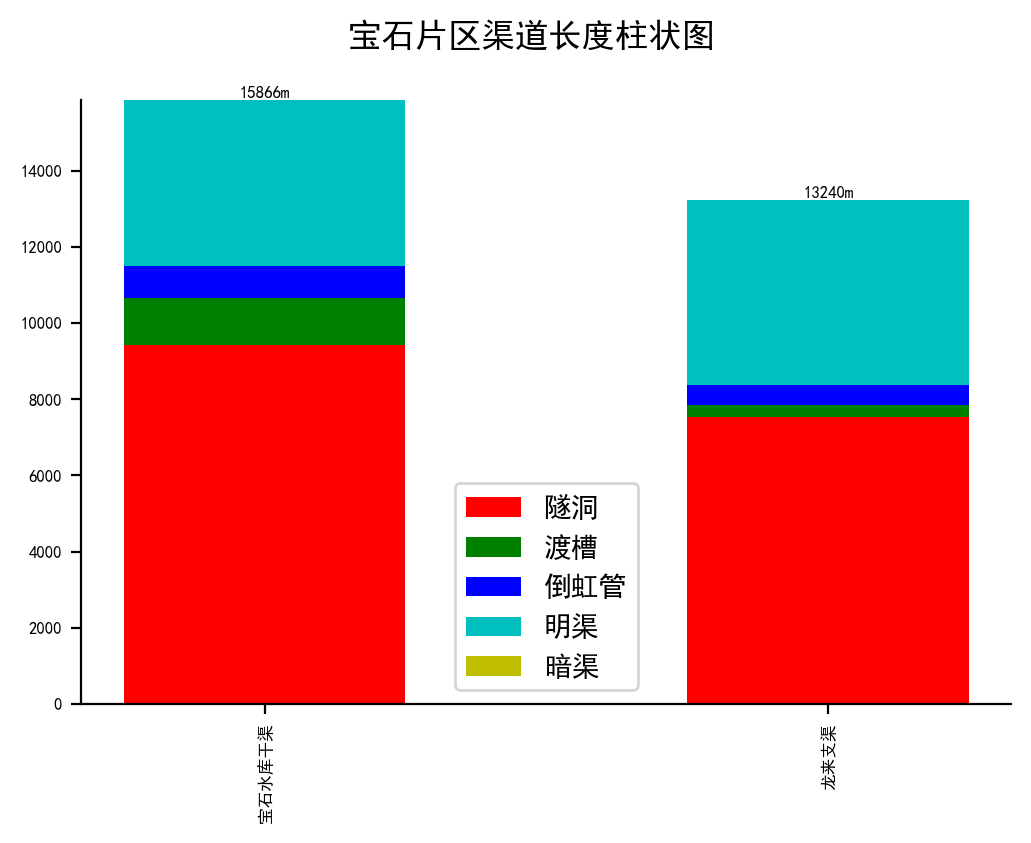

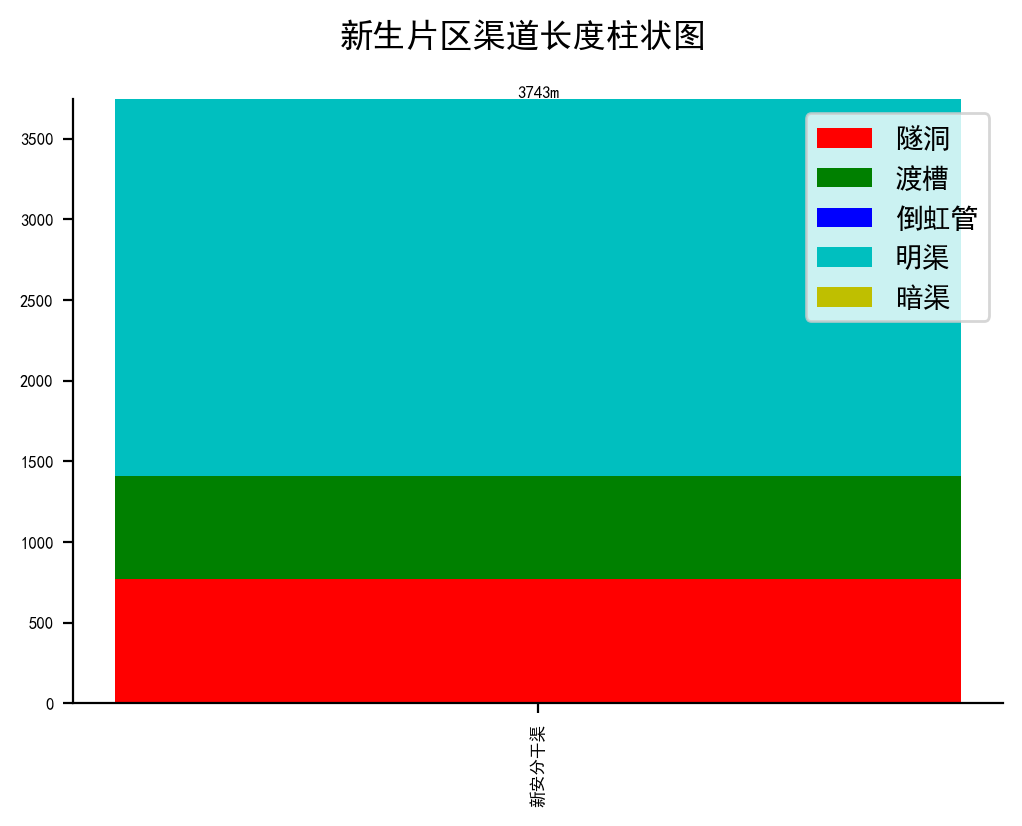

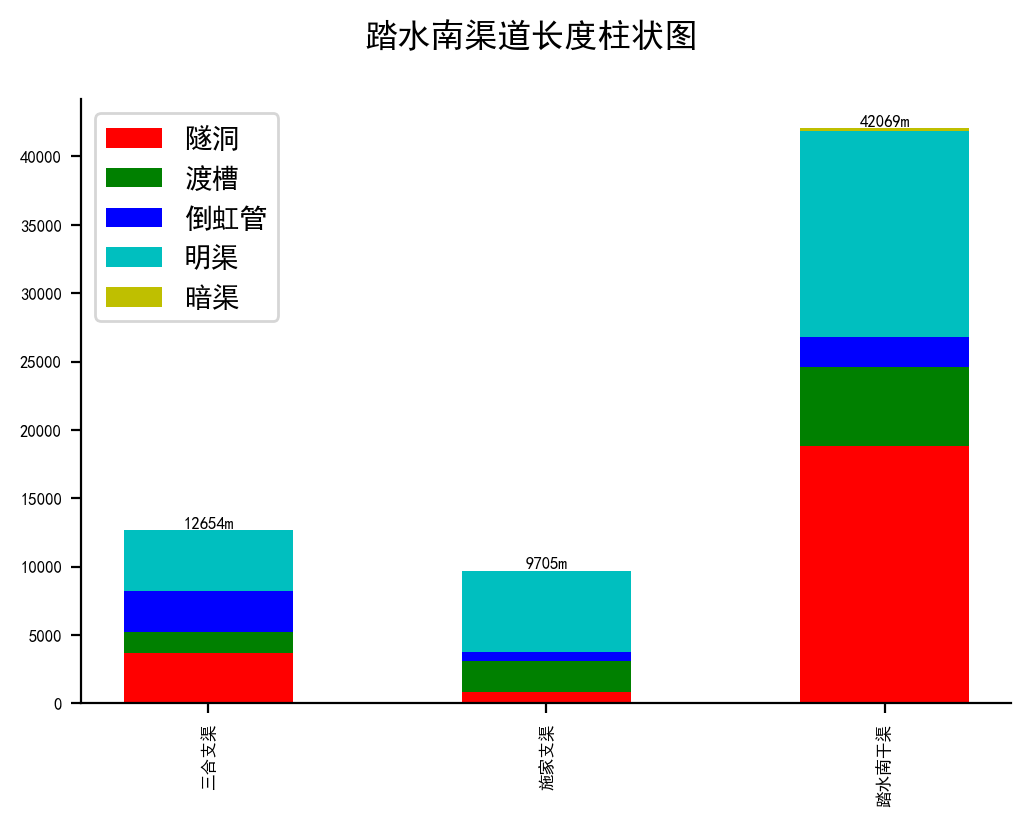

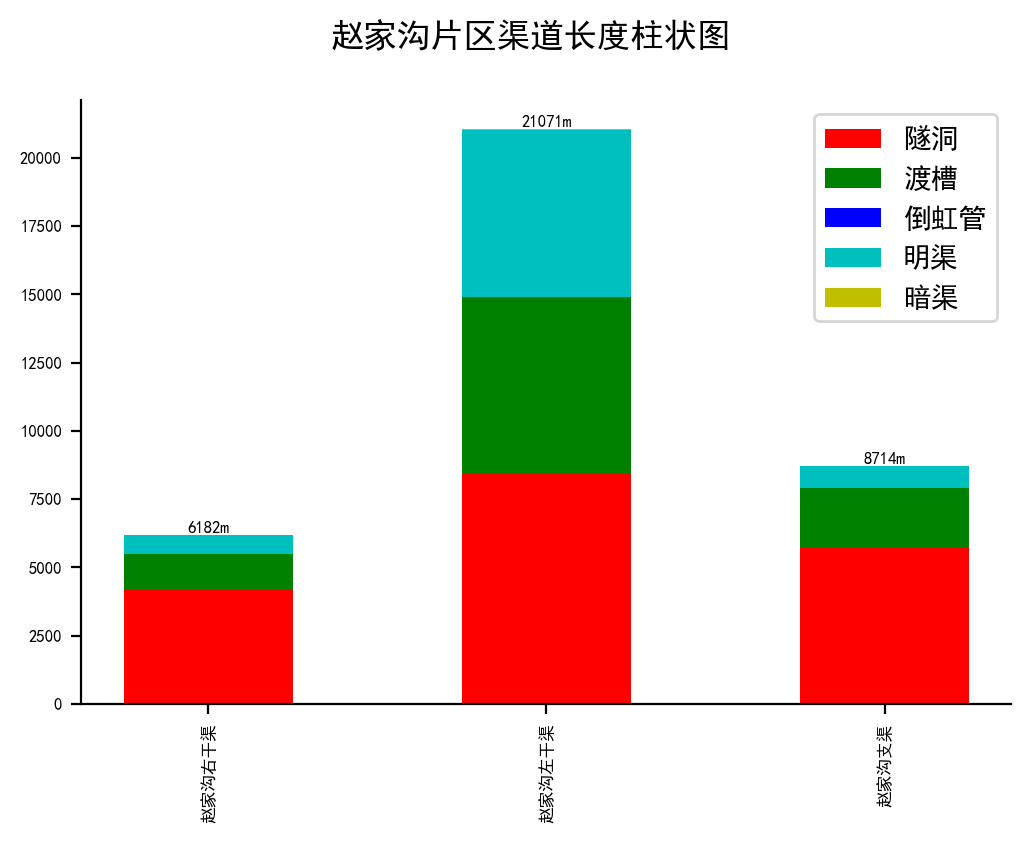

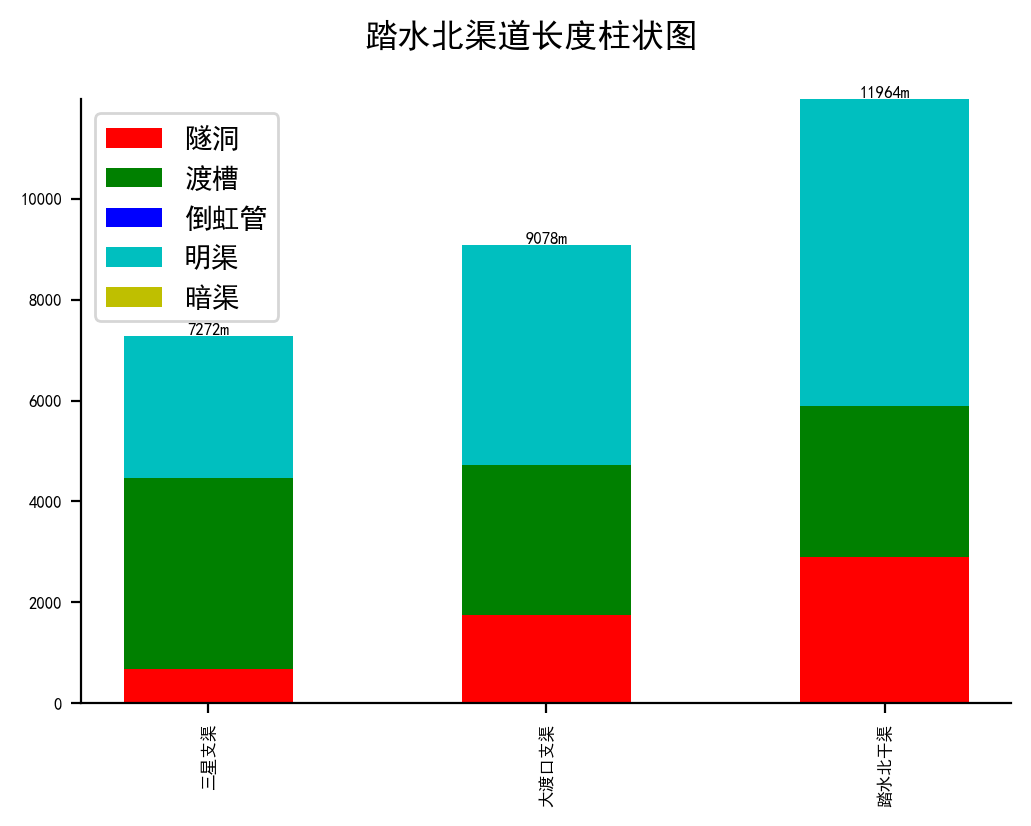

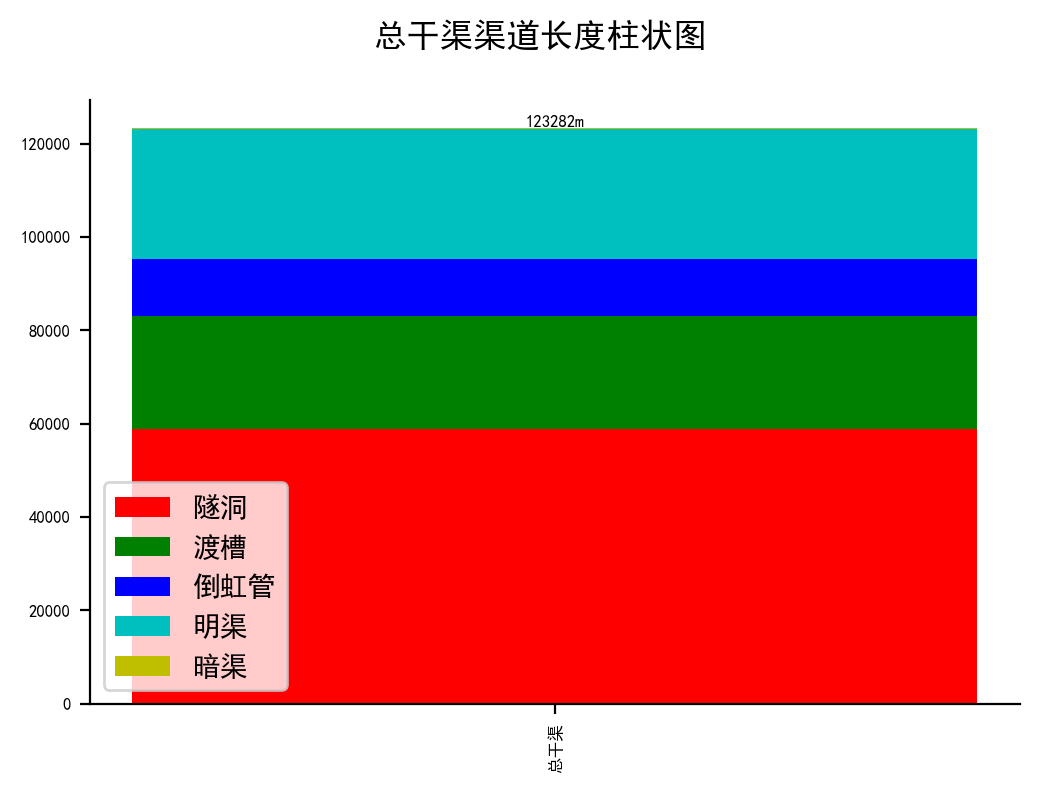

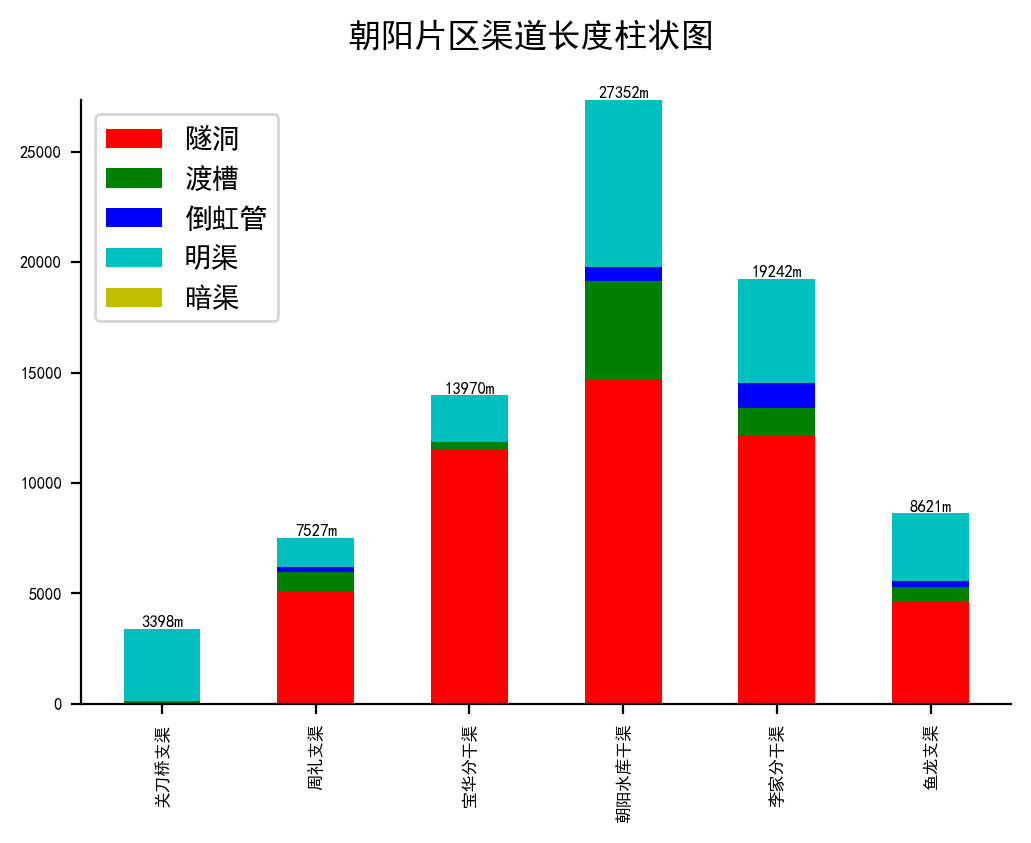

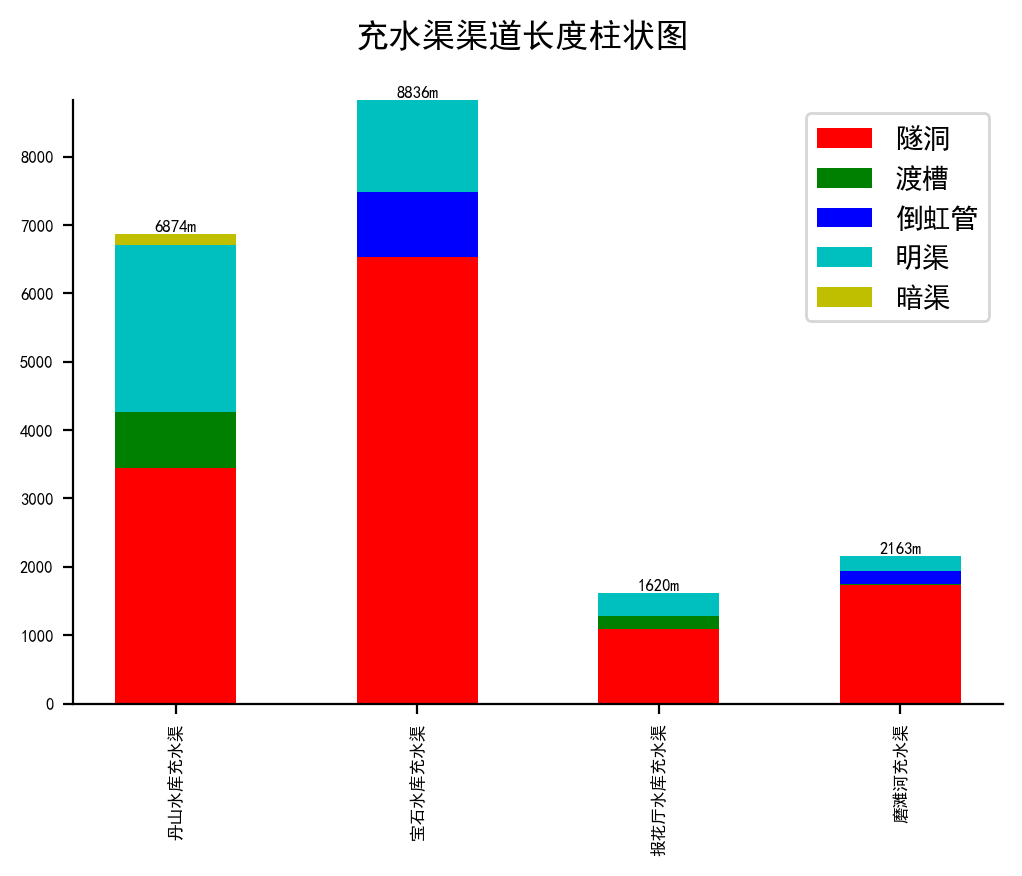

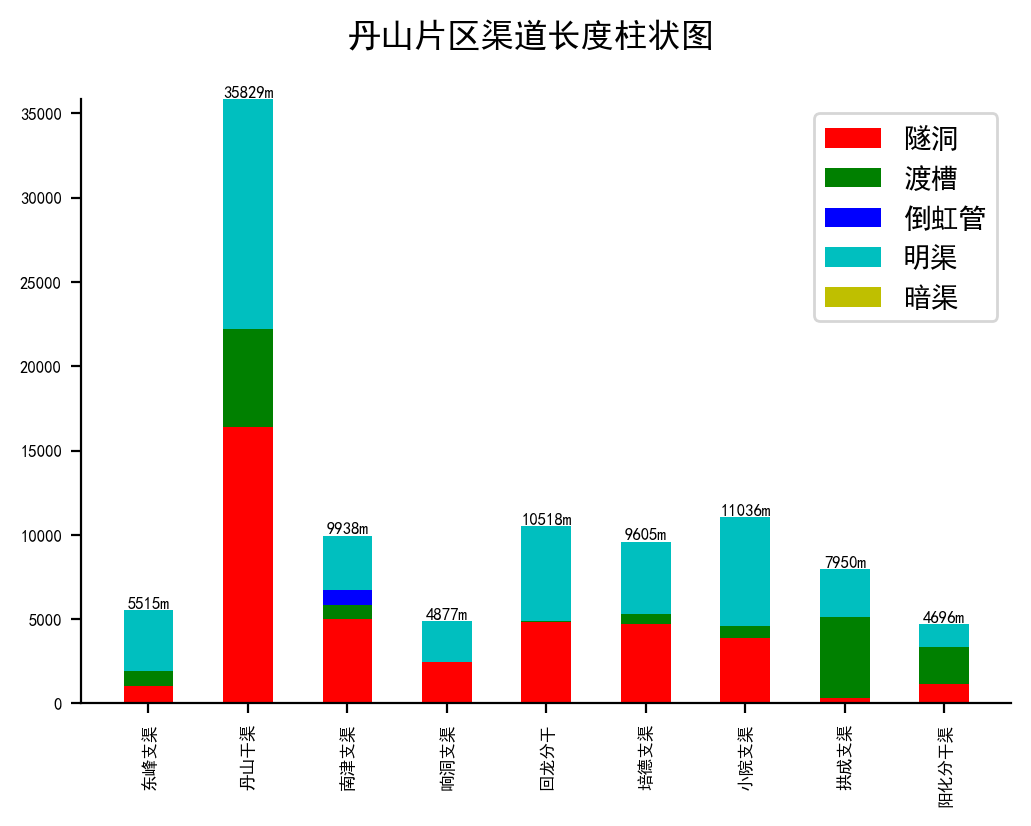

In [ ]:

import pandas as pd
path = r'G:\工程项目\毗河二期\项目管理/' 
df = pd.read_excel(path + '交叉建筑物涉及调线汇总（高速及铁路）.xlsx',  sheet_name = '渠道', index_col = [2], header = [0],nrows =  34)
df['片区'].ffill(inplace = True)

canal_part = set(df['片区'])
canal_part
structures_len_name['片区'] = df['片区']
# structures_len_name




png_path = r'G:\工程项目\毗河二期\3灌区可研\渠道建筑物长度图/'

# 在各分片里面分别操作
for i in canal_part: 
    canal_names = structures_len_name[structures_len_name['片区'] == i].index.tolist()
    canal_lens = list(structures_len_name[structures_len_name['片区'] == i]['渠道总长'])
    
#     渠道按比例处理
    canal_lens2 = [round(j/sum(k),3) for k in canal_lens for j in k]
    canal_lens3 = [canal_lens2[m:m+5] for m in range(0,len(canal_lens2),5)]
    canal_names, canal_lens
                # 各建筑物分片画图
    part_bar = get_part_bar(canal_names, canal_lens, i)
    part_png_name = os.path.join(png_path, '%s渠道长度柱状图.png'%i)
    part_bar.savefig(part_png_name)


In [ ]:

inverted_siphons.reset_index(drop = True).to_excel(path + '倒虹管汇总.xlsx')
inverted_siphons.reset_index(drop = True)

,建筑物名称,进口桩号,出口桩号,长度,流量段,渠道,备注
0,水竹林倒虹管,6906.18,7781.24,875.061,1,南津支渠,NaN
1,红旗倒虹管,198.428,643.51,445.082,1,宝石水库充水渠,NaN
2,邓家湾倒虹管,6352.03,6853.39,501.356,1,宝石水库充水渠,NaN
3,关上沟倒虹管,1673.29,1874.33,201.043,1,磨滩河充水渠,NaN
4,李家祠堂倒虹管,2323.24,2584.42,261.177,2,宝石水库干渠,NaN
5,狮子岩倒虹管,5346.49,5427.72,81.228,3,宝石水库干渠,NaN
6,谭家坝子倒虹管,7123.35,7396.15,272.798,3,宝石水库干渠,NaN
7,大屋基倒虹管,9421.73,9641.54,219.804,3,宝石水库干渠,NaN
8,三里杯倒虹管,155.811,470.544,314.733,1,龙来支渠,NaN
9,庙儿坡倒虹管,10286.5,10497.8,211.352,1,龙来支渠,NaN


In [ ]:
path = r'G:\工程项目\毗河二期\项目管理/' 
df = pd.read_excel(path + '交叉建筑物涉及调线汇总（高速及铁路）.xlsx',  sheet_name = '渠道', index_col = [2], header = [0],nrows =  34)
df['渠道总长'] = canal_len_name['渠道总长']
canal = df['渠道总长']
canal

In [ ]:
app = xw.App(visible = False, add_book = False)  # 启动Excel程序
workbook = app.books.open(path + '交叉建筑物涉及调线汇总（高速及铁路） - 副本.xlsx')  # 打开工作簿
worksheet = workbook.sheets  # 列出工作簿中的所有工作表
worksheet['渠道'].range('K2').value = df['渠道总长'].values
workbook.save()  # 保存工作簿
workbook.close()  # 关闭工作簿

app.quit()  # 退出Excel程序  

### 建筑物分类画图

In [ ]:
# -*- encoding: utf-8 -*-


def canal_pie(structure_len,canal_name):
    import numpy as np
    from matplotlib import pyplot as plt

    plt.rcParams['savefig.dpi'] = 200 #图片像素
    plt.rcParams['figure.dpi'] = 200 #分辨率
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体以便正确显示汉字
    plt.rcParams['axes.unicode_minus'] = False # 正确显示连字符
    x = structure_len
    labels = ['隧洞', '渡槽', '倒虹管', '明渠', '暗渠']
    fig = plt.figure()
    fig.suptitle(canal_name+'各建筑物分类长度示意图', fontsize = 12)

    # 添加子图的方式二
    ax_bar = fig.add_subplot(121)
    ax_pie = fig.add_subplot(122)

    ax_bar.set_title('各建筑物分类长度', fontsize = 10)
    ax_pie.set_title('各建筑物分类长度比例', fontsize = 10)

    explode = (0, 0, 0, 0, 0)

    index = np.arange(len(labels))
    width = 0.5
    x2 = index - width / 2

    ax_bar.bar(x2, tick_label=labels,height = structure_len, width=width)
    ax_bar.spines["top"].set_visible(False)#上轴不显示
    ax_bar.spines["right"].set_visible(False)
    
    for lobj in ax_bar.get_yticklabels():
        lobj.set_size(8)
    for lobj in ax_bar.get_xticklabels():
        lobj.set_size(8)
    


    for a,b in zip(x2,x):    
        ax_bar.text(a,b+2,'%.00fm' %b, ha='center', va='bottom', fontsize=8)

    # l_text是饼图对着文字大小，p_text是饼图内文字大小
    ax_pie,l_text,p_text = ax_pie.pie(x,labels=labels, explode=explode, autopct='%1.2f%%', startangle=90,pctdistance=0.7)

    for t in p_text:
        t.set_size(8)
    for t in l_text:
        t.set_size(8)

    plt.axis('equal')
#     plt.savefig(r'C:\Users\HQ\Desktop\导出的图片.png')
#     plt.show()
    return fig


In [ ]:
png_name = r'C:\Users\HQ\Desktop\建筑物分类长度图.png'
a = canal_pie(structure_len,canal_name)
a.savefig(png_name)

### 片区画图

In [ ]:
structure_lens = canal_lens[0:5]
canal_names = canal_names[0:5]

In [ ]:
def get_part_bar(canal_names, structure_lens, part_name = 0):
    import numpy as np
    from matplotlib import pyplot as plt

    plt.rcParams['savefig.dpi'] = 200 #图片像素
    plt.rcParams['figure.dpi'] = 200 #分辨率
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体以便正确显示汉字
    plt.rcParams['axes.unicode_minus'] = False # 正确显示连字符

    labels = ['隧洞', '渡槽', '倒虹管', '明渠', '暗渠']
    tunnel_lens = [i[0] for i in structure_lens]
    aqueduct_lens = [i[1] for i in structure_lens]
    inverted_siphon_lens = [i[2] for i in structure_lens]
    cannel_lens = [i[3] for i in structure_lens]
    underground_culvert_lens = [i[4] for i in structure_lens]
    structure_len = [sum(i) for i in structure_lens]  # 每条渠道的长度

    fig = plt.figure()
    fig.suptitle(part_name + '渠道长度柱状图', fontsize = 12)

    # 添加子图
    ax_bar = fig.add_subplot(111)

    index = np.arange(len(canal_names))
    width = 0.5
    x = index - width / 2 
              
    colors = ['r','g','b','c','y']

    #隧洞条形图
    ax_bar.bar(x,  #指定条形图x轴的刻度值
            height = tunnel_lens,  #指定条形图y轴的数值
            bottom = 0,  #用于绘制堆叠条形图,图形起始高度
            tick_label = canal_names,  #指定条形图y轴的刻度标签
            width= width,
            color = colors[0],  #指定条形图的填充色
            label = labels[0],  #图形的标签
            )

    #渡槽条形图
    ax_bar.bar(x,  #指定条形图x轴的刻度值
            height = aqueduct_lens,  #指定条形图y轴的数值
            bottom = tunnel_lens,  #用于绘制堆叠条形图,图形起始高度
            width= width,
            color = colors[1],  #指定条形图的填充色
            label = labels[1],  #图形的标签
            )

    #倒虹管
    ax_bar.bar(x,  #指定条形图x轴的刻度值
            height = inverted_siphon_lens,  #指定条形图y轴的数值
            bottom = [i+j for i ,j in zip(tunnel_lens , aqueduct_lens)],  #用于绘制堆叠条形图,图形起始高度
            width= width,
            color = colors[2],  #指定条形图的填充色
            label = labels[2],  #图形的标签
            )

    #明渠
    ax_bar.bar(x,  #指定条形图x轴的刻度值
            height = cannel_lens,  #指定条形图y轴的数值
            bottom = [i+j+k for i ,j,k in zip(tunnel_lens , aqueduct_lens,inverted_siphon_lens)],  #用于绘制堆叠条形图,图形起始高度
            width= width,
            color = colors[3],  #指定条形图的填充色
            label = labels[3],  #图形的标签
            )

    #暗渠
    ax_bar.bar(x,  #指定条形图x轴的刻度值
            height = underground_culvert_lens,  #指定条形图y轴的数值
            bottom = [i+j+k+l for i ,j,k,l in zip(tunnel_lens , aqueduct_lens,inverted_siphon_lens, cannel_lens)],  #用于绘制堆叠条形图,图形起始高度
            width= width,
            color = colors[4],  #指定条形图的填充色
            label = labels[4],  #图形的标签
            )
    
    ax_bar.spines["top"].set_visible(False)#上轴不显示
    ax_bar.spines["right"].set_visible(False)

    for lobj in ax_bar.get_yticklabels():
        lobj.set_size(6)
    for lobj in ax_bar.get_xticklabels():
        lobj.set_size(6)
        lobj.set_rotation(90) 
        
#     ax_bar.set_ylim((0,max(structure_len))) #画图的范围
#     plt.ylim((0,max(structure_len)))       

    # # 标注各建筑物长度
    # for index, value in enumerate(structure_len):    
    #     y = value/2
    #     if index - 1 >= 0:
    #         y = y + sum(structure_len[0:index])
    #     ax_bar.text(x,  y ,'%s%.00fm' % (labels[index],value), ha='center', va='bottom', fontsize=6)

    for a,b in zip(x,structure_len): 
        a,b
        ax_bar.text(a,b+2,'%.00fm' %b, ha='center', va='bottom', fontsize=6)

    plt.legend()
    plt.show()
    return fig

### 单独

In [ ]:
import pandas as pd
import random
import numpy as np
import os
import codecs
import time
import tkinter as tk
from tkinter import filedialog
from openpyxl import load_workbook
from openpyxl.styles import colors
from openpyxl.styles import Font, Color
from tkinter.filedialog import asksaveasfilename

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 要读取的水面线结果文件
# load_file_name = filedialog.askopenfilename(title = "请选择计算原始数据文件")

# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\宝石分干渠 龙来支渠 提校核20210430\宝石水库分干20210225调整隧洞进出口\水面线/'

# path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\踏水南干渠\水面线\水面线2021.2.9/'
# # path = r'G:\工程项目\毗河二期（黄强）\可研\校核\总干渠工程量2021.5.11/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\宝石分干渠 龙来支渠 提校核20210430\龙来支渠工程量 20210416 调线后\水面线/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\朝阳干渠-已校/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\宝华分干渠（2021.05.24）\宝华分干渠水面线计算2021.03/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\关刀桥支渠/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\磨滩河2021.05\磨滩河冲水渠水面线计算2021.03/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\鱼龙支渠/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\周礼支渠\周礼水面线计算2021.03/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\新安分干渠\1 新安分干 2019.-水面计算/'
path = r'G:\工程项目\毗河二期\3灌区可研\水面线\水面线_汇总/'
path = r'G:\工程项目\长征渠\7图纸\含重庆_咨询后\水面线\水面线2021.6.11/'
load_file_name = path + 'result.txt'

# load_file_name = path + 'result.txt'
water_sufurce_file = path + '渠道水面线.xlsx'
canal_down_elv_file = path + '渠底顶板顶高程.xlsx'

list1 = []
with open(load_file_name, 'r',encoding="ANSI") as f:
    for line in f.readlines():
        a = line.strip().split()
        b = a[1:21]  # 这是选取需要读取的位数
        list1.append(b) # 将其添加在列表之中
f.close() 

water_result = pd.DataFrame(list1).dropna(how='all')

# 去除桩号逆序行
a = []
for i in range(len(water_result.index)) :
    if i+2 <= len(water_result)-1:
        if (float(water_result.iloc[i+2, 4]) - float(water_result.iloc[i+1, 4]) <= 0) & (water_result.iloc[i+2, 0] == water_result.iloc[i+1, 0]):
            a.append(i+2)
            
a
water_result = water_result.drop(a)
water_result.iloc[1:,1].replace('********', 0, inplace=True)
water_result.iloc[1:,1:16] = water_result.iloc[1:,1:16].astype(float)
water_result.iloc[1:,18:20] = water_result.iloc[1:,18:20].astype(float)

structure_statistics = water_result
structure_statistics.columns = structure_statistics.iloc[0,:]
structure_statistics = structure_statistics.drop(0)

# structure_statistics.loc[(structure_statistics['渠道类型'] == 1) & (structure_statistics['渠道尺寸序号'] == 1), 'IP点'] = '明渠'
# structure_statistics.loc[(structure_statistics['渠道类型'] == 1) & (structure_statistics['渠道尺寸序号'] == 2), 'IP点'] = '矩形渠'
structure_statistics#.head(60)

In [ ]:
a = structure_statistics[['桩号MC','IP点']]
b = a.loc[a['IP点'].str.contains('[进出]'),:]

b.to_excel(path + '建筑物.xlsx')

In [ ]:
qdzh = structure_statistics.loc[1,'桩号BC']
zdzh = structure_statistics.loc[len(structure_statistics),'桩号EC']

tunnel = structure_statistics.loc[(structure_statistics['渠道类型'] == 3) & (structure_statistics['渠道尺寸序号'] == 1) , ['IP点', '桩号MC', '进出口代码']]
tunnel = tunnel.loc[tunnel['进出口代码'] !=0]
tunnel['建筑物名称'] = tunnel.loc[(tunnel['进出口代码'] == 1) | (tunnel['进出口代码'] == 2), 'IP点'].str.replace(r'[进出]','',regex = True)
tunnel['进口桩号'] = tunnel.loc[(tunnel['进出口代码'] == 1), '桩号MC']
tunnel['出口桩号'] = tunnel.loc[(tunnel['进出口代码'] == 2), '桩号MC']
tunnel['出口桩号'] = tunnel['出口桩号'].shift(-1) #提一行起来
tunnel_out = tunnel.loc[:,'建筑物名称':'出口桩号'].dropna(subset = ['进口桩号','出口桩号']).reset_index(drop = True)

aqueduct = structure_statistics.loc[structure_statistics['渠道类型'] == 2 , ['IP点', '桩号MC', '进出口代码']]
aqueduct = aqueduct.loc[aqueduct['进出口代码'] !=0]
aqueduct['建筑物名称'] = aqueduct.loc[(aqueduct['进出口代码'] == 1) | (aqueduct['进出口代码'] == 2), 'IP点'].str.replace(r'[进出]','',regex = True)
aqueduct['进口桩号'] = aqueduct.loc[(aqueduct['进出口代码'] == 1), '桩号MC']
aqueduct['出口桩号'] = aqueduct.loc[(aqueduct['进出口代码'] == 2), '桩号MC']
aqueduct['出口桩号'] = aqueduct['出口桩号'].shift(-1) #提一行起来
aqueduct_out = aqueduct.loc[:,'建筑物名称':'出口桩号'].dropna(subset = ['进口桩号','出口桩号']).reset_index(drop = True)

inverted_siphon = structure_statistics.loc[structure_statistics['渠道尺寸序号'] == 5 , ['IP点', '桩号MC', '进出口代码']]
inverted_siphon = inverted_siphon.loc[inverted_siphon['进出口代码'] !=0]
inverted_siphon['建筑物名称'] = inverted_siphon.loc[(inverted_siphon['进出口代码'] == 1) | (inverted_siphon['进出口代码'] == 2), 'IP点'].str.replace(r'[进出]','',regex = True)
inverted_siphon['进口桩号'] = inverted_siphon.loc[(inverted_siphon['进出口代码'] == 1), '桩号MC']
inverted_siphon['出口桩号'] = inverted_siphon.loc[(inverted_siphon['进出口代码'] == 2), '桩号MC']
inverted_siphon['出口桩号'] = inverted_siphon['出口桩号'].shift(-1) #提一行起来
inverted_siphon_out = inverted_siphon.loc[:,'建筑物名称':'出口桩号'].dropna(subset = ['进口桩号','出口桩号']).reset_index(drop = True)

underground_culvert = structure_statistics.loc[(structure_statistics['渠道类型'] == 3) & (structure_statistics['渠道尺寸序号'] == 2)  , ['IP点', '桩号MC', '进出口代码']]
underground_culvert = underground_culvert.loc[underground_culvert['进出口代码'] !=0]
underground_culvert['建筑物名称'] = underground_culvert.loc[(underground_culvert['进出口代码'] == 1) | (underground_culvert['进出口代码'] == 2), 'IP点'].str.replace(r'[进出]','',regex = True)
underground_culvert['进口桩号'] = underground_culvert.loc[(underground_culvert['进出口代码'] == 1), '桩号MC']
underground_culvert['出口桩号'] = underground_culvert.loc[(underground_culvert['进出口代码'] == 2), '桩号MC']
underground_culvert['出口桩号'] = underground_culvert['出口桩号'].shift(-1) #提一行起来
underground_culvert_out = underground_culvert.loc[:,'建筑物名称':'出口桩号'].dropna(subset = ['进口桩号','出口桩号']).reset_index(drop = True)

sluice = structure_statistics.loc[(structure_statistics['渠道类型'] == 1) & (structure_statistics['渠道尺寸序号'] == 4)  , ['IP点', '桩号MC', '进出口代码']]
sluice = sluice[sluice['桩号MC']!=0]
sluice['建筑物名称'] = sluice['IP点'].str.replace(r'[进出]','',regex = True)
sluice = sluice.drop_duplicates(subset = '建筑物名称',keep = 'last').reset_index(drop = True)
# sluice

structure = tunnel_out.append([aqueduct_out,inverted_siphon_out,underground_culvert_out]).sort_values(by = '进口桩号').reset_index(drop = True).set_index('建筑物名称')

channel = pd.DataFrame()
channel['进口桩号'] = structure['出口桩号']
channel['出口桩号'] = structure['进口桩号']
channel['出口桩号'] = channel['出口桩号'].shift(-1) #提一行起来
channel = channel.loc[channel['进口桩号']!= channel['出口桩号']] #去掉长度为0的明渠
channel = channel.reset_index(drop = True)

if (qdzh !=  structure['进口桩号'][0]): #起点不是建筑物进口时，增加一行明渠[起点桩号:第一个建筑物进口]，未考虑闸
    channel.loc[-1] = [qdzh , structure['进口桩号'][0]]
    channel = channel.sort_values(by = '进口桩号').reset_index(drop = True)
if zdzh !=  structure['出口桩号'][len(structure)-1] : #终点不是建筑物进口时，增加一行明渠[起点桩号:第一个建筑物进口]，未考虑闸
    channel.loc[len(channel)-1,'出口桩号'] = zdzh
else:
    channel = channel.drop(len(channel)-1) 

channel['建筑物名称'] = [f'明渠{x}' for x in range(1, len(channel)+1)]
channel = channel.set_index('建筑物名称')

structure_all = structure.append(channel).sort_values(by = '进口桩号')
structure_all['长度'] = structure_all['出口桩号'] - structure_all['进口桩号']
structure_all['流量段'] = 1

if sluice.empty == False:    
    j = 2 # 用于流量段计量
    for i in sluice.index:
        if '分水' in sluice.loc[i,'IP点']:
            structure_all.loc[(structure_all['进口桩号'] >= sluice['桩号MC'][i] ), '流量段'] = j
            structure_all.loc[(structure_all['进口桩号'] <= sluice['桩号MC'][i]) & (sluice['桩号MC'][i]<= structure_all['出口桩号']), '备注'] = sluice['建筑物名称'][i]
            j += 1

            
structure_all['流量段'] = structure_all['流量段'].fillna(1).astype(int)  

structure_all['序号'] = range(1,len(structure_all)+1)
structure_all = structure_all.reset_index().set_index('序号')
# sluice
print()
structure_all#.head(108)



In [ ]:
a = structure_all[structure_all['流量段'] == 5]

b = a.loc[a['建筑物名称'].str.endswith('隧')]
b
b['长度'].sum()

,建筑物名称,进口桩号,出口桩号,长度,流量段
序号,,,,,


0.0

In [ ]:
aqueduct_out['长度'] = aqueduct_out['出口桩号'] - aqueduct_out['进口桩号']
aqueduct_out
aqueduct_out['长度'].sum()

tunnel_out['长度'] = tunnel_out['出口桩号'] - tunnel_out['进口桩号']
tunnel_out
tunnel_out['长度'].sum()

inverted_siphon_out['长度'] = inverted_siphon_out['出口桩号'] - inverted_siphon_out['进口桩号']
inverted_siphon_out
inverted_siphon_out.sum()

,进口桩号,出口桩号,长度
建筑物名称,,,
黄桷渡槽,346.0,548.0,202.0
玉皇沟渡槽,929.0,1124.0,195.0
肖家沟渡槽,3063.0,3243.0,180.0
跑马滩渡槽,3657.0,3718.0,61.0


638.0

,进口桩号,出口桩号,长度
建筑物名称,,,
黄桷1#隧洞,279.0,316.0,37.0
黄桷2#隧洞,657.0,890.0,233.0
大坡隧洞,1960.0,2097.0,137.0
王家湾隧洞,2598.0,2773.0,175.0
七龙店隧洞,2848.0,3039.0,191.0


773.0

,进口桩号,出口桩号,长度
建筑物名称,,,


0
进口桩号    0.0
出口桩号    0.0
长度      0.0
dtype: float64

## input整理

In [ ]:
# import pandas as pd
# import random
# import numpy as np
# import os
# import codecs
import re
# import tkinter as tk
# from tkinter import filedialog
# from openpyxl import load_workbook
# from openpyxl.styles import colors
# from openpyxl.styles import Font, Color
# from tkinter.filedialog import asksaveasfilename

# 要读取的水面线结果文件
# load_file_name = filedialog.askopenfilename(title = "请选择计算原始数据文件")

# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\宝石分干渠 龙来支渠 提校核20210430-已校\宝石水库分干20210225调整隧洞进出口\水面线/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\宝石分干渠 龙来支渠 提校核20210430-已校\龙来支渠工程量 20210416 调线后\水面线/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\朝阳干渠-已校/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\宝华分干渠（2021.05.24）-已校\宝华分干渠水面线计算2021.03/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\关刀桥支渠/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\磨滩河2021.05\磨滩河冲水渠水面线计算2021.03/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\新安分干渠\1 新安分干 2019.-水面计算/'

# path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\踏水南干渠\水面线\水面线2021.2.9/'
# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\总干渠工程量2021.5.11/'

def get_dm(file):
    
    import pandas as pd
    load_file_name = file
    list1 = []
    with open(load_file_name, 'r',encoding="ANSI") as f:
        for index, line in enumerate(f.readlines()):
    #         a = line.strip()
            a = re.sub('[,，）]',' ',line).strip().split(' ')
    #         a
            list1.append(a) # 将其添加在列表之中
    f.close() 
    
    
    dm = pd.DataFrame(list1).dropna(how = 'all',axis = 1).replace(regex=r'[\s]', value='')
    dm.iloc[3,0]='明渠底宽'
    dm.iloc[4,0]='渡槽半径'
    dm.iloc[5,0]='隧洞底宽'

    n = int(dm.loc[7,1]) # 流量段数量

    channel_n = list(dm.loc[8:(8+n-1),1].astype(int)) # 明渠断面数量
    aqueduct_n = list(dm.loc[8:(8+n-1),2].astype(int)) # 渡槽断面数量
    tunnel_n = list(dm.loc[8:(8+n-1),3].astype(int)) # 隧洞断面数量

    flow_segments = list(dm.iloc[8:(8+n),0].astype(float)) # 流量
    # n, flow_segments
    # channel_n,aqueduct_n,tunnel_n

    dm.head(60)

    dm_channel = pd.DataFrame()
    dm_aqueduct = pd.DataFrame()
    dm_tunnel = pd.DataFrame()
    dm_len_add = 0
    len_v_add = 0
    dm_len_add_v = 0
    for i in range(0,len(flow_segments)):
        dm_len = channel_n[i] + aqueduct_n[i] + tunnel_n[i]
        dm_i = dm.iloc[(7+n+2+ dm_len_add):(7+n+2+ dm_len_add + dm_len),:].reset_index(drop=True).dropna(how = 'all',axis = 1)
        dm_len_add = dm_len_add + dm_len + 1
        
        len_v = 8+n+sum(channel_n)+ sum(aqueduct_n)+ sum(tunnel_n)+n+3  # 流速起始位置        
        len_v_add = len_v + dm_len_add_v
        dm_len_add_v = dm_len_add

    #     dm_i
        dm_channel_i = dm_i.iloc[0:channel_n[i],:].copy().dropna(how = 'all',axis = 1)
        dm_channel_i.columns = dm.iloc[3,:].dropna(how = 'all')
        dm_channel_i['流量段'] = i+1
        dm_channel_i['设计流量'] = flow_segments[i]
#         print(len_v_add,len_v_add+channel_n[i])
#         print(dm.iloc[len_v_add : len_v_add+channel_n[i],0].values)
        dm_channel_i['设计流速'] = dm.iloc[len_v_add : len_v_add+channel_n[i],0].values
        
        dm_channel = dm_channel.append(dm_channel_i)

        dm_aqueduct_i = dm_i.iloc[channel_n[i]:channel_n[i]+aqueduct_n[i],:].copy().dropna(how = 'all')
        dm_aqueduct_i.columns = dm.iloc[4,:].dropna(how = 'all')
        dm_aqueduct_i['流量段'] = i+1
        dm_aqueduct_i['设计流量'] = flow_segments[i]
        dm_aqueduct_i['设计流速'] = dm.iloc[len_v_add+channel_n[i]:len_v_add+channel_n[i]+aqueduct_n[i],0].values
        dm_aqueduct = dm_aqueduct.append(dm_aqueduct_i)


        dm_tunnel_i = dm_i.iloc[channel_n[i]+aqueduct_n[i]:channel_n[i]+aqueduct_n[i]+tunnel_n[i],:].copy().dropna(how = 'all')
        dm_tunnel_i.columns = dm.iloc[5,:].dropna(how = 'all')
        dm_tunnel_i['流量段'] = i+1
        dm_tunnel_i['设计流量'] = flow_segments[i]
        dm_tunnel_i['设计流速'] = dm.iloc[len_v_add+channel_n[i]+aqueduct_n[i]:len_v_add+channel_n[i]+aqueduct_n[i]+tunnel_n[i],0].values
        dm_tunnel = dm_tunnel.append(dm_tunnel_i)

    dm_channel = dm_channel.drop('衬砌底厚度',axis = 1).drop_duplicates().reset_index(drop=True).sort_values(by = '流量段')
    dm_aqueduct = dm_aqueduct.drop('结构底厚度',axis = 1).drop_duplicates().reset_index(drop=True)
    dm_tunnel = dm_tunnel.drop('结构底厚度',axis = 1).drop_duplicates().reset_index(drop=True)
    return dm_channel, dm_aqueduct, dm_tunnel

In [ ]:
dm = get_dm(r'G:\工程项目\毗河二期\3灌区可研\水面线\input文件\毗河二期_踏水南_踏水南干渠_黄强_input.txt')
dm_channel  = dm[0].astype(float)                   
dm_aqueduct = dm[1].astype(float)                
dm_tunnel   = dm[2].astype(float)
dm_channel
dm_aqueduct
dm_tunnel

In [ ]:
import os, shutil
from pathlib import Path
import pandas as pd
import xlwings as xw

path = r'G:\工程项目\毗河二期\项目管理/'
searchfolder = r'G:\工程项目\毗河二期\3灌区可研\水面线\input文件/'

basepath = Path(searchfolder) 
dirs_in_basepath = (file for file in basepath.iterdir() if file.is_file()) #目标路径下的文件迭代器

dm_channel_all = pd.DataFrame()
dm_aqueduct_all = pd.DataFrame()
dm_tunnel_all = pd.DataFrame()

for item in dirs_in_basepath: 
    if str(item).endswith('txt'):
#         print(item)
        dm = get_dm(item)
        dm_channel  = dm[0].astype(float)                   
        dm_aqueduct = dm[1].astype(float)                
        dm_tunnel   = dm[2].astype(float)
        
        dm_channel['渠道名称'] = item.stem.split('_')[2]   
        dm_aqueduct['渠道名称'] = item.stem.split('_')[2] 
        dm_tunnel['渠道名称'] = item.stem.split('_')[2]  
        
        dm_channel_all = dm_channel_all.append(dm_channel)
        dm_aqueduct_all = dm_aqueduct_all.append(dm_aqueduct)
        dm_tunnel_all = dm_tunnel_all.append(dm_tunnel)
        
dm_channel_all.set_index('渠道名称',inplace=True)
dm_aqueduct_all.set_index('渠道名称',inplace=True)
dm_tunnel_all.set_index('渠道名称',inplace=True)


In [ ]:
dm_channel_all
dm_aqueduct_all
dm_tunnel_all
goal_file = path+'毗河二期渠道断面尺寸_汇总.xlsx'
dm_channel_all.to_excel(goal_file)

app = xw.App(visible = False, add_book = False)  # 启动Excel程序
workbook = app.books.open(goal_file)  # 打开工作簿
worksheet = workbook.sheets  # 列出工作簿中的所有工作表

worksheet['Sheet1'].range('L1').value = dm_aqueduct_all
worksheet['Sheet1'].range('W1').value = dm_tunnel_all

worksheet['Sheet1']['L64'].value = '渡槽表中当底宽>0时，该渡槽为矩形渡槽，相应渡槽半径值无效。'
worksheet['Sheet1']['L65'].value = '各表中建筑高度指净空高度。'

worksheet['Sheet1']['A1:AF1'].api.Font.Bold = True
for i in ['B1','M1','X1','L64','L65']:
    worksheet['Sheet1'][i].api.Font.Color = xw.utils.rgb_to_int((255,0,0)) #设置工作表标题行的字体颜色为“白色”
#     worksheet['Sheet1'][i].color = xw.utils.rgb_to_int((255,0,0))   # 设置工作表标题行的单元格填充颜色为“红色” 
    
worksheet['Sheet1']['A2'].expand('table').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter  # 设置工作表水平对齐方式为“居中”         
worksheet['Sheet1']['A2'].expand('table').api.VerticalAlignment = xw.constants.VAlign.xlVAlignCenter  # 设置工作表垂直对齐方式为“居中”

workbook.save()  # 保存工作簿
workbook.close()  # 关闭工作簿
app.quit()  # 退出Excel程序


In [ ]:
canal_flow = dm_channel_all.reset_index()[['渠道名称','设计流量']].drop_duplicates().astype('str')
canal_flows = canal_flow.groupby(by='渠道名称').apply(lambda x:x['设计流量'].str.cat(sep=',')).reset_index()#
canal_flows.set_index('渠道名称',inplace=True)
canal_flows.rename(columns = {0:'设计流量'},inplace=True)
canal_flows
path = r'G:\工程项目\毗河二期\项目管理/' 
df = pd.read_excel(path + '交叉建筑物涉及调线汇总（高速及铁路）.xlsx',  sheet_name = '渠道', index_col = [2], header = [0],nrows =  34)
df['设计流量'] = canal_flows['设计流量']
df['设计流量']


,设计流量
渠道名称,
三合支渠,1.15
三星支渠,4.0
东峰支渠,1.5
丹山干渠,"27.36,23.37,21.61,14.99,13.07,10.76,7.64,4.97"
丹山水库充水渠,11.0
关刀桥支渠,2.0
南津支渠,2.5
周礼支渠,1.4
响洞支渠,1.4


渠道名称
总干渠                              38.0,28.0,26.0,24.0,12.7
踏水北干渠                                      14.1,9.13,7.46
三星支渠                                                  4.0
大渡口支渠                                                2.14
踏水南干渠                            9.14,8.54,6.76,4.24,1.98
三合支渠                                                 1.15
施家支渠                                                  1.8
赵家沟左干渠                                          5.29,3.86
赵家沟右干渠                                          5.84,1.88
赵家沟支渠                                                 2.0
新安分干渠                                                 4.7
宝石水库干渠                                   13.9,5.8,3.8,2.8
龙来支渠                                                 1.35
丹山干渠        27.36,23.37,21.61,14.99,13.07,10.76,7.64,4.97
回龙分干                                                 4.14
响洞支渠                                                  1.4
阳化分干渠                                            5.99,4.1
拱成支渠     

In [ ]:
app = xw.App(visible = False, add_book = False)  # 启动Excel程序
workbook = app.books.open(path + '交叉建筑物涉及调线汇总（高速及铁路） - 副本.xlsx')  # 打开工作簿
worksheet = workbook.sheets  # 列出工作簿中的所有工作表
worksheet['渠道'].range('K38').value = df['设计流量'].values
workbook.save()  # 保存工作簿
workbook.close()  # 关闭工作簿

app.quit()  # 退出Excel程序  

## ZPMHT_file整理

In [ ]:
import os
def treat_ZPMHT(ZPMHT_file, ZPMHT_file_treated):
    '''去除ZPMHT_file中的渐变段行'''
    with open(ZPMHT_file_treated, 'w', encoding="ANSI") as result:
        with open(ZPMHT_file, 'r',encoding="ANSI") as f:        
            for line in f.readlines():
                if '渐变段' not in line:
                    result.write(line)
                
                
    
    
path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\施家支渠\水面线\水面线2021.3.31'
path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\踏水南干渠\水面线\水面线2021.2.9'
# path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\三合支渠\三合支渠-水面线计算'
# path = r'G:\工程项目\毗河二期（黄强）\可研\赵家沟左干渠\赵家沟左干水面线和线路201909\水面线计算v07-2020.9.27'
ZPMHT_file_name = 'ZPMHT.txt'
ZPMHT_file_treated_name = 'ZPMHT_treated.txt'
ZPMHT_file = os.path.join(path, ZPMHT_file_name) 
ZPMHT_file_treated = os.path.join(path, ZPMHT_file_treated_name) 

treat_ZPMHT(ZPMHT_file, ZPMHT_file_treated) 

## 平面画图整理

### 控制点坐标表处理

In [ ]:
import sys
import os
import scipy as sp
from scipy.interpolate import interp1d

sys.path.append(r'C:\Users\HQ\Code\canal')
import DataProcessing as dp

import pandas as pd
import re    
import numpy as np

path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\施家支渠\工程量/'
path2 = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\施家支渠\水面线\水面线2021.3.31'
file = 'sj.xlsx'
cadtxt = 'sj建筑物进出口坐标.txt'


path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\踏水南干渠\踏水南工程量/'
path2 = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\踏水南干渠\水面线\水面线2021.2.9'
file = 'tsn.xlsx'
cadtxt = 'tsn建筑物进出口坐标.txt'

path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\三合支渠\工程量/'
path2 = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\三合支渠\三合支渠-水面线计算'
file = 'sh.xlsx'
cadtxt = 'sh建筑物进出口坐标.txt'

path = r'G:\工程项目\毗河二期（黄强）\可研\赵家沟左干渠\赵家沟左干渠工程量/'
path2 = r'G:\工程项目\毗河二期（黄强）\可研\赵家沟左干渠\赵家沟左干水面线和线路201909\水面线计算v07-2020.9.27'
file = 'zjg.xlsx'
cadtxt = 'zjg建筑物进出口坐标.txt'

result_file = os.path.join(path2,'result.txt')

# 处理建筑物进出口坐标
coordinates = []

coordinate_file = os.path.join(path,cadtxt)

# 建筑物的坐标值读取，并调整格式
with open(coordinate_file, 'r') as f:
    for line in f.readlines():
        coordinate = re.sub('[Point(X = Y Z  )]','',line).strip().rstrip(',0.000')
        coordinates.append(coordinate)


channel_basic_in_file = os.path.join(path,file)
a = dp.DataProcessing(channel_basic_in_file)
c = a.canal_structure_zh_sorting  # 建筑物进出口参数
d = a.c3d_data_processing   # 弯道参数

# 建筑物的坐标赋值
c['坐标值'] = pd.DataFrame(coordinates)

# 合并参数
structure_control = c.append(d[0])
structure_control.sort_values(by=['BC里程'],inplace = True)
structure_control.reset_index(drop=True,inplace = True)


# 坐标值分为两列
x = np.array([structure_control['坐标值'].str.split(',')])[0]
y = pd.DataFrame(x)
structure_control['E'] = y[0].astype(float)
structure_control['N'] = y[1].astype(float)
structure_control.drop(columns='坐标值',inplace = True)
structure_control.rename(columns={'半径':'半径R(m)','转角':'转角α(°)','切线长':'切线长T(m)','弧长':'弧长S(m)'},inplace=True)

# 加复合列名称
idx1 = ['IP','坐标值(m)','坐标值(m)','桩号(km+m)','桩号(km+m)','桩号(km+m)','弯道参数','弯道参数','弯道参数','弯道参数']
idx2 = ['IP','E','N','BC里程','MC里程','EC里程','半径R(m)','转角α(°)','切线长T(m)','弧长S(m)']
structure_control = structure_control[idx2]

# 调整小数位数
temp = structure_control.round({'E':3,'N':3,'BC里程':2,'MC里程':2,'EC里程':2,'半径R(m)':0,'转角α(°)':3,'切线长T(m)':3,'弧长S(m)':3})

structure_control2 = pd.DataFrame(temp.values,columns = [idx1,idx2])


# 读取水面线
water_sufurce = get_structure_statistics(result_file)[6]

# 定义插值函数
x = water_sufurce['桩号MC'].astype(float).values # x轴坐标
y_water_sufurce = water_sufurce['IP点水位'].values
y_canal_down = water_sufurce['IP点底高程'].values
f_water_sufurce = sp.interpolate.interp1d(x, y_water_sufurce, kind='linear', fill_value='extrapolate') # 水面线线性插值函数
f_canal_down = sp.interpolate.interp1d(x, y_canal_down, kind='linear', fill_value='extrapolate') # 渠底高程线性插值函数

zh = list(structure_control2[('桩号(km+m)','MC里程')].values)


structure_control2[('高程(m)','水面')] = f_water_sufurce(zh) # 渠底高程写入表格
structure_control2[('高程(m)','渠底顶')] = f_canal_down(zh)  # 渠底高程写入表格

water_sufurce
structure_control2



# structure_control2.to_excel(path+file.replace('.xlsx','控制点坐标表.xlsx'))#,float_format='%.3f'

,IP点,转弯半径,转弯角度,桩号BC,桩号MC,桩号EC,渠道类型,渠道尺寸序号,进出口代码,水头损失和,水面过渡值,延程水头损失,局部水头损失,弯道水头损失,预留水头损失,指定水头损失,渐进渐出水位,渐进渐出底高程,IP点水位,IP点底高程
1,鸡公坡隧进,0,0,0,0,0,3,1,1,0,436.5,0,0,0,0,0.1,********,********,436.5,434.775
2,鸡公坡隧出,0,0,474.094,474.094,474.094,3,1,2,0.191,436.309,0.215,-0.024,0,0,0,436.309,434.469,436.285,434.56
3,IP1,25,19.44,569.64,573.88,578.12,1,1,0,0.021,436.287,0.019,0,0.001,0.002,0,********,********,436.288,434.448
4,IP2,25,20.007,657.85,662.215,666.58,1,1,0,0.02,436.267,0.018,0,0.001,0.002,0,********,********,436.268,434.428
5,IP3,25,42.759,754.22,763.55,772.88,1,1,0,0.024,436.244,0.02,0,0.001,0.002,0,********,********,436.244,434.404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,IP90,25,32.526,20645.7,20652.8,20659.9,1,1,0,0.009,427.577,0.007,0,0.001,0.001,0,********,********,427.578,425.943
182,IP91,25,5.544,20703.1,20704.3,20705.5,1,1,0,0.012,427.566,0.01,0,0,0.001,0,********,********,427.566,425.931
183,李家湾隧进,0,0,20718.2,20718.2,20718.2,3,1,1,0.041,427.524,0.002,0.04,0,0,0,427.564,425.929,427.524,426.047
184,李家湾隧出,0,0,21037.2,21037.2,21037.2,3,1,2,0.124,427.4,0.145,-0.021,0,0,0,427.400,425.765,427.379,425.902


IP  坐标值(m)              桩号(km+m)                     弯道参数          \
          IP       E            N     BC里程     MC里程     EC里程 半径R(m)  转角α(°)   
0    鸡公坡隧洞进口  489669  3.37093e+06        0        0        0    NaN     NaN   
1        IP0  489669  3.37093e+06        0        0        0    NaN     NaN   
2    鸡公坡隧洞出口  490143  3.37096e+06   474.09   474.09   474.09    NaN     NaN   
3        IP1  490242  3.37097e+06   569.64   573.88   578.12     25   19.44   
4        IP2  490327  3.37094e+06   657.85   662.22   666.58     25  20.007   
..       ...     ...          ...      ...      ...      ...    ...     ...   
181     IP90  496574  3.36074e+06  20645.7  20652.8  20659.9     25  32.526   
182     IP91  496530  3.36071e+06  20703.1  20704.3  20705.5     25   5.544   
183  李家湾隧洞进口  496520  3.36071e+06  20718.2  20718.2  20718.2    NaN     NaN   
184  李家湾隧洞出口  496269  3.36051e+06  21037.2  21037.2  21037.2    NaN     NaN   
185     IP92  496242  3.36049e+06    21071    21071    21071    NaN     NaN   

                          高程(m)              
    切线长T(m)  弧长S(m)          水面         渠底顶  
0       NaN     NaN  436.500000  434.775000  
1       NaN     NaN  436.500000  434.775000  
2       NaN     NaN  436.285002  434.560002  
3     4.282   8.482  436.288000  434.448000  
4      4.41   8.731  436.267999  434.427999  
..      ...     ...         ...         ...  
181   7.294  14.194  427.577999  425.942999  
182   1.211    2.42  427.566000  425.931000  
183     NaN     NaN  427.524000  426.047000  
184     NaN     NaN  427.379002  425.901983  
185     NaN     NaN  427.394000  425.759000  

[186 rows x 12 columns]

# 总干渠渡槽校核

In [ ]:
import pandas as pd
import random
import numpy as np
import os
import codecs
import re
import tkinter as tk
from tkinter import filedialog
from openpyxl import load_workbook
from openpyxl.styles import colors
from openpyxl.styles import Font, Color
from tkinter.filedialog import asksaveasfilename

# 要读取的水面线结果文件
# load_file_name = filedialog.askopenfilename(title = "请选择计算原始数据文件")

# path = r'G:\工程项目\毗河二期（黄强）\可研\校核\宝石分干渠 龙来支渠 提校核20210430\宝石水库分干20210225调整隧洞进出口\水面线/'

# path = r'G:\工程项目\毗河二期（黄强）\可研\踏水南渠道\踏水南干渠\水面线\水面线2021.2.9/'
path = r'G:\工程项目\毗河二期（黄强）\可研\校核\总干渠工程量2021.5.11\渡槽\分流量段成果1\分流量段成果\/'

load_file_name = path + '总干渠第一流量段渡槽工程量统计2021.4.21x.xlsx'
df0 = pd.read_excel(load_file_name, sheet_name='支撑工程量',header=27,nrows = 818).ffill()
df = df0.iloc[:,:-11]
df['架空'] = df['渠道内侧底线高程'] - df['地面线高程']
df
df.loc[:,'开挖深度':].sum()

In [ ]:
df = df0.iloc[:,:-42]
dfx = pd.read_excel(load_file_name, sheet_name='支撑工程量',header=854,nrows = 66).ffill()
dfx= dfx.iloc[:,:-43]
dfx['支撑型式判断'] = 5
df_all1 = df.append(dfx).sort_values(by='桩号')
df_all1
len(set(df_all1['渡槽名称']))
set(df_all1['渡槽名称'])



aqueduct = pd.read_excel('G:\工程项目\毗河二期（黄强）\可研\校核\总干渠工程量2021.5.11\zg建筑物特性.xlsx', sheet_name='渡槽统计表',header=0)
aqueduct1 = aqueduct.loc[aqueduct['流量段']==1]

,渡槽名称,ip,桩号,建基面高程,地面线高程,渠道内侧底线高程,开挖深度,总高度,支撑型式判断
0,狗跳地渡槽,1.0,11634.690,464.959,469.002,469.031000,4.043,4.072000,5
1,狗跳地渡槽,2.0,11646.690,463.443,467.820,469.026872,4.377,5.583872,5
2,狗跳地渡槽,3.0,11658.690,462.537,466.748,469.022744,4.211,6.485744,5
3,狗跳地渡槽,4.0,11670.690,462.143,464.996,469.018616,2.853,6.875616,5
4,狗跳地渡槽,5.0,11682.690,454.529,459.972,469.014488,5.443,14.485488,5
...,...,...,...,...,...,...,...,...,...
62,大井湾渡槽,63.0,37846.566,445.481,457.735,457.695364,12.254,12.214364,5
63,大井湾渡槽,64.0,37858.566,446.319,457.756,457.691257,11.437,11.372257,5
64,大井湾渡槽,65.0,37870.566,448.713,457.777,457.687151,9.064,8.974151,5
65,大井湾渡槽,66.0,37880.566,452.123,457.794,457.683730,5.671,5.560730,5


27

{' 三湾堰渡槽',
 ' 大堰塘湾1#渡槽',
 ' 大堰塘湾2#渡槽',
 ' 驼子桥渡槽',
 ' 麻风梁子渡槽',
 'xx',
 '唐家湾1#渡槽',
 '唐家湾2#渡槽',
 '大井湾渡槽',
 '宽沟渡槽',
 '小沟渡槽',
 '小湾渡槽',
 '干湾渡槽',
 '新塘坊渡槽',
 '晋家湾渡槽',
 '杨家湾渡槽',
 '杨溪河渡槽',
 '松树坪渡槽',
 '段家1#渡槽',
 '段家2#渡槽',
 '狗跳地渡槽',
 '狮子山渡槽',
 '玉皇观渡槽',
 '胡家渡槽',
 '菱角渡槽',
 '雷家湾渡槽',
 '龙门垭渡槽'}

In [ ]:
df['支撑高度'] = df['渠道内侧底线高程'] - df['建基面高程']-2.5
df00 = df.loc[df['支撑型式判断']==0]

df00

print('最大架空：')
df00['架空'].max(), 81*44.4
print('最大支撑高度：')
df00['支撑高度'].max()


df00.loc[:,'开挖深度':].sum()

# for i, df1 in df.groupby('支撑型式判断') :
#     i
#     df1
    
#     df1.loc[:,'开挖深度':].sum()

,渡槽名称,ip,桩号,建基面高程,地面线高程,渠道内侧底线高程,开挖深度,总高度,支撑型式判断,基础C20(m3),...,开挖石方量(m3),开挖土方量(m3),基础（t）,排架（t）,墩身（t）,基础（t）.1,桩基（t）,每个基础填方量(m^3),架空,支撑高度
0,段家1#渡槽,1.0,15191.355,465.051,472.832,467.551000,7.781,2.500000,0,55.536000,...,501.949387,1171.215237,3.332160,0.0,0.0,0.0,0.0,32.768,-5.281000,-5.684342e-14
1,段家1#渡槽,2.0,15195.355,465.050,470.783,467.549629,5.733,2.499629,0,55.523109,...,261.279386,609.651900,3.331387,0.0,0.0,0.0,0.0,32.768,-3.233371,-3.713894e-04
13,段家1#渡槽,14.0,15366.360,465.015,469.641,467.491000,4.626,2.476000,0,54.702960,...,169.944392,396.536916,3.282178,0.0,0.0,0.0,0.0,32.768,-2.150000,-2.400000e-02
14,段家2#渡槽,15.0,15719.189,465.293,469.473,467.292999,4.180,1.999999,0,38.180976,...,139.834209,326.279821,2.290859,0.0,0.0,0.0,0.0,32.768,-2.180001,-5.000007e-01
24,段家2#渡槽,25.0,15889.188,464.777,469.067,467.234000,4.290,2.457000,0,54.043470,...,146.924950,342.824882,3.242608,0.0,0.0,0.0,0.0,32.768,-1.833000,-4.300000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,小沟渡槽,811.0,36540.273,456.259,460.096,458.259000,3.837,2.000000,0,38.181000,...,119.085545,277.866271,2.290860,0.0,0.0,0.0,0.0,32.768,-1.837000,-5.000000e-01
814,小沟渡槽,812.0,36777.348,456.178,459.414,458.178000,3.236,2.000000,0,38.181000,...,87.462344,204.078803,2.290860,0.0,0.0,0.0,0.0,32.768,-1.236000,-5.000000e-01
815,大井湾渡槽,813.0,37774.566,455.720,461.419,457.720000,5.699,2.000000,0,38.181000,...,258.099734,602.232712,2.290860,0.0,0.0,0.0,0.0,32.768,-3.699000,-5.000000e-01
816,大井湾渡槽,814.0,37786.566,455.716,460.332,457.715894,4.616,1.999894,0,38.177318,...,169.229126,394.867960,2.290639,0.0,0.0,0.0,0.0,32.768,-2.616106,-5.001061e-01


最大架空：


(0.4879999999999427, 3596.4)

最大支撑高度：


0.0

开挖深度                 256.006863
总高度                  168.823369
支撑型式判断                 0.000000
基础C20(m3)           3329.500148
盖梁C25(m3)              0.000000
柱C25(m3)               0.000000
连系梁C25(m3)             0.000000
墩帽实心面积                 0.000000
空心段上部面积                0.000000
空心段下部内圆弧半径             0.000000
空心段下部外圆弧半径             0.000000
空心段下部面积                0.000000
墩底部实心段上部面积             0.000000
墩底部实心段下部内圆弧半径          0.000000
墩底部实心段下部外圆弧半径          0.000000
墩底部实心段下部面积             0.000000
墩身C30总体积(m3)           0.000000
墩底扩大台阶长（C25）           0.000000
墩底扩大台阶宽（C25）           0.000000
基础长（C25）               0.000000
基础宽（C25）               0.000000
基础总砼方量（C20）(m3)        0.000000
桩C25（m）                0.000000
地面开挖面长边             1232.913725
地面开挖面短边              827.913725
开挖总方量(m3)          26080.084638
开挖石方量(m3)           7824.025391
开挖土方量(m3)          18256.059247
基础（t）                199.770009
排架（t）                  0.000000
墩身（t）                  0.000000
基础（t）.1 

In [ ]:
df['支撑高度'] = df['渠道内侧底线高程'] - df['建基面高程']-2.5
df01 = df.loc[df['支撑型式判断']==1]
df01['盖梁'] = df['支撑高度'] * 7*1.8+2*0.25*.4*1.8
df01

# df00['柱体积'] = df00
print('最大、最小支撑高度：')
df01['支撑高度'].max(),df01['支撑高度'].min()


print('最大,最小架空：')
df01['架空'].max(), df01['架空'].min()
df01[['盖梁C25(m3)','盖梁']]
df01.loc[:,'开挖深度':].sum()

C:\Users\HQ\scoop\apps\python37\current\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,渡槽名称,ip,桩号,建基面高程,地面线高程,渠道内侧底线高程,开挖深度,总高度,支撑型式判断,基础C20(m3),...,开挖土方量(m3),基础（t）,排架（t）,墩身（t）,基础（t）.1,桩基（t）,每个基础填方量(m^3),架空,支撑高度,盖梁
12,段家1#渡槽,13.0,15355.355,464.454000,466.454000,467.494773,2.000000,3.040773,1,44.4,...,91.900667,2.664,1.599637,0.0,0.0,0.0,86.886667,1.040773,5.407730e-01,7.173740
23,段家2#渡槽,24.0,15883.187,464.471000,466.471000,467.236083,2.000000,2.765083,1,44.4,...,91.900667,2.664,0.824506,0.0,0.0,0.0,86.886667,0.765083,2.650827e-01,3.700042
26,新塘坊渡槽,27.0,16180.316,463.482000,465.482000,467.056883,2.000000,3.574883,1,44.4,...,91.900667,2.664,3.101340,0.0,0.0,0.0,86.886667,1.574883,1.074883e+00,13.903522
58,龙门垭渡槽,43.0,18398.867,462.252333,464.668061,465.115586,2.415728,2.863253,1,44.4,...,124.140890,2.664,1.100523,0.0,0.0,0.0,132.944128,0.447525,3.632531e-01,4.936989
59,龙门垭渡槽,43.0,18410.867,461.966619,464.326414,465.111449,2.359795,3.144830,1,44.4,...,119.495681,2.664,1.892203,0.0,0.0,0.0,126.308116,0.785034,6.448296e-01,8.484853
60,龙门垭渡槽,43.0,18422.867,461.680905,464.039614,465.107311,2.358710,3.426406,1,44.4,...,119.406486,2.664,2.683883,0.0,0.0,0.0,126.180695,1.067696,9.264060e-01,12.032716
72,杨溪河渡槽,70.0,21017.459,460.929000,462.929000,463.925000,2.000000,2.996000,1,44.4,...,91.900667,2.664,1.473754,0.0,0.0,0.0,86.886667,0.996000,4.960000e-01,6.609600
262,杨溪河渡槽,260.0,23633.459,459.747000,461.747000,462.997481,2.000000,3.250481,1,44.4,...,91.900667,2.664,2.189252,0.0,0.0,0.0,86.886667,1.250481,7.504810e-01,9.816061
263,杨溪河渡槽,261.0,23645.459,460.493000,463.941000,462.993226,3.448000,2.500226,1,44.4,...,228.558278,2.664,0.079835,0.0,0.0,0.0,282.111826,-0.947774,2.258155e-04,0.362845
314,菱角渡槽,312.0,24825.422,459.925000,462.425000,462.612976,2.500000,2.687976,1,44.4,...,131.325833,2.664,0.607712,0.0,0.0,0.0,143.208333,0.187976,1.879757e-01,2.728494


最大、最小支撑高度：


(1.1869881909861988, 5.684341886080802e-14)

最大,最小架空：


(1.6869881909861988, -0.947774184511843)

,盖梁C25(m3),盖梁
12,7.271079,7.173740
23,3.747757,3.700042
26,14.097001,13.903522
58,5.002375,4.936989
59,8.600922,8.484853
60,12.199469,12.032716
72,6.698880,6.609600
262,9.951147,9.816061
263,0.362886,0.362845
314,2.762329,2.728494


开挖深度                100.277233
总高度                 151.558980
支撑型式判断               48.000000
基础C20(m3)          2131.200000
盖梁C25(m3)           420.603761
柱C25(m3)              0.000000
连系梁C25(m3)            0.000000
墩帽实心面积                0.000000
空心段上部面积               0.000000
空心段下部内圆弧半径            0.000000
空心段下部外圆弧半径            0.000000
空心段下部面积               0.000000
墩底部实心段上部面积            0.000000
墩底部实心段下部内圆弧半径         0.000000
墩底部实心段下部外圆弧半径         0.000000
墩底部实心段下部面积            0.000000
墩身C30总体积(m3)          0.000000
墩底扩大台阶长（C25）          0.000000
墩底扩大台阶宽（C25）          0.000000
基础长（C25）              0.000000
基础宽（C25）              0.000000
基础总砼方量（C20）(m3)       0.000000
桩C25（m）               0.000000
地面开挖面长边             627.754465
地面开挖面短边             387.754465
开挖总方量(m3)          6816.462425
开挖石方量(m3)          2044.938727
开挖土方量(m3)          4771.523697
基础（t）               127.872000
排架（t）                92.532827
墩身（t）                 0.000000
基础（t）.1               0.000000
桩基（t）   

In [ ]:
df['支撑高度'] = df['渠道内侧底线高程'] - df['建基面高程']-2.5-1.2
df02 = df.loc[df['支撑型式判断']==2].copy()
# df00['柱体积'] = df00
df02['柱体积'] = df02['支撑高度'] * 1.5*0.7*2
df02['连系梁数量'] = df['支撑高度']//5
df02['连系梁'] = (5.1*0.8*0.6+0.3**2*0.6*2) * (df02['支撑高度']//5)
df02['盖梁'] = 16.7
df02

print('最大、最小支撑高度：')
df02['支撑高度'].max(),df02['支撑高度'].min()
print('最大,最小架空：')
df02['架空'].max(), df02['架空'].min()

df02[['支撑高度','柱C25(m3)','柱体积','连系梁C25(m3)','连系梁']]

df02.loc[:,'开挖深度':].sum()

,渡槽名称,ip,桩号,建基面高程,地面线高程,渠道内侧底线高程,开挖深度,总高度,支撑型式判断,基础C20(m3),...,墩身（t）,基础（t）.1,桩基（t）,每个基础填方量(m^3),架空,支撑高度,柱体积,连系梁数量,连系梁,盖梁
2,段家1#渡槽,3.0,15207.355,462.733,464.733,467.545514,2.000,4.812514,2,44.4,...,0.0,0.0,0.0,86.886667,2.812514,1.112514,2.336280,0.0,0.000,16.7
3,段家1#渡槽,4.0,15219.355,450.610,452.610,467.541400,2.000,16.931400,2,44.4,...,0.0,0.0,0.0,86.886667,14.931400,13.231400,27.785941,2.0,5.112,16.7
10,段家1#渡槽,11.0,15331.355,454.276,456.276,467.503001,2.000,13.227001,2,44.4,...,0.0,0.0,0.0,86.886667,11.227001,9.527001,20.006703,1.0,2.556,16.7
11,段家1#渡槽,12.0,15343.355,460.235,462.235,467.498887,2.000,7.263887,2,44.4,...,0.0,0.0,0.0,86.886667,5.263887,3.563887,7.484163,0.0,0.000,16.7
15,段家2#渡槽,16.0,15731.187,458.100,460.878,467.288835,2.778,9.188835,2,44.4,...,0.0,0.0,0.0,179.390435,6.410835,5.488835,11.526554,1.0,2.556,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,胡家渡槽,801.0,35728.535,447.096,449.096,458.667307,2.000,11.571307,2,44.4,...,0.0,0.0,0.0,86.886667,9.571307,7.871307,16.529746,1.0,2.556,16.7
804,胡家渡槽,802.0,35740.535,447.096,449.096,458.663208,2.000,11.567208,2,44.4,...,0.0,0.0,0.0,86.886667,9.567208,7.867208,16.521138,1.0,2.556,16.7
805,胡家渡槽,803.0,35752.535,447.698,449.698,458.659110,2.000,10.961110,2,44.4,...,0.0,0.0,0.0,86.886667,8.961110,7.261110,15.248330,1.0,2.556,16.7
806,胡家渡槽,804.0,35764.535,450.894,452.894,458.655011,2.000,7.761011,2,44.4,...,0.0,0.0,0.0,86.886667,5.761011,4.061011,8.528122,0.0,0.000,16.7


最大、最小支撑高度：


(13.757974651395774, 0.022779053553324546)

最大,最小架空：


(15.457974651395773, 1.7227790535533245)

,支撑高度,柱C25(m3),柱体积,连系梁C25(m3),连系梁
2,1.112514,2.336280,2.336280,0.000,0.000
3,13.231400,27.785941,27.785941,5.112,5.112
10,9.527001,20.006703,20.006703,2.556,2.556
11,3.563887,7.484163,7.484163,0.000,0.000
15,5.488835,11.526554,11.526554,2.556,2.556
...,...,...,...,...,...
803,7.871307,16.529746,16.529746,2.556,2.556
804,7.867208,16.521138,16.521138,2.556,2.556
805,7.261110,15.248330,15.248330,2.556,2.556
806,4.061011,8.528122,8.528122,0.000,0.000


开挖深度                1021.503779
总高度                 5194.692782
支撑型式判断               976.000000
基础C20(m3)          21667.200000
盖梁C25(m3)           8147.160000
柱C25(m3)            7117.094841
连系梁C25(m3)          1178.316000
墩帽实心面积                 0.000000
空心段上部面积                0.000000
空心段下部内圆弧半径             0.000000
空心段下部外圆弧半径             0.000000
空心段下部面积                0.000000
墩底部实心段上部面积             0.000000
墩底部实心段下部内圆弧半径          0.000000
墩底部实心段下部外圆弧半径          0.000000
墩底部实心段下部面积             0.000000
墩身C30总体积(m3)           0.000000
墩底扩大台阶长（C25）           0.000000
墩底扩大台阶宽（C25）           0.000000
基础长（C25）               0.000000
基础宽（C25）               0.000000
基础总砼方量（C20）(m3)        0.000000
桩C25（m）                0.000000
地面开挖面长边             6386.207559
地面开挖面短边             3946.207559
开挖总方量(m3)          70391.096947
开挖石方量(m3)          21117.329084
开挖土方量(m3)          49273.767863
基础（t）               1300.032000
排架（t）               3617.365585
墩身（t）                  0.000000
基础（t）.1 

In [ ]:
df['支撑高度'] = df['渠道内侧底线高程'] - df['建基面高程']-2.5-1.2
df03 = df.loc[df['支撑型式判断']==3].copy()
# df00['柱体积'] = df00
df03['柱体积'] = df03['支撑高度'] * 0.8*0.6*4
df03['连系梁数量'] = df['支撑高度']//5
df03['连系梁'] = (5*0.5*0.7+1.4*.35*.6+0.3**2*0.85)*2 * (df03['支撑高度']//5)
df03['盖梁'] = 15.34
df03

print('最大、最小支撑高度：')
df03['支撑高度'].max(),df03['支撑高度'].min()
print('最大,最小架空：')
df03['架空'].max(), df03['架空'].min()

df03[['支撑高度','架空','柱C25(m3)','柱体积','连系梁C25(m3)','连系梁']]

df03.loc[:,'开挖深度':].sum()

,渡槽名称,ip,桩号,建基面高程,地面线高程,渠道内侧底线高程,开挖深度,总高度,支撑型式判断,基础C20(m3),...,墩身（t）,基础（t）.1,桩基（t）,每个基础填方量(m^3),架空,支撑高度,柱体积,连系梁数量,连系梁,盖梁
4,段家1#渡槽,5.0,15231.355,449.945,452.291,467.537286,2.346,17.592286,3,59.712,...,0.0,0.0,0.0,140.125648,15.246286,13.892286,26.673189,2.0,8.482,15.34
5,段家1#渡槽,6.0,15243.355,442.116,447.166,467.533172,5.050,25.417172,3,59.712,...,0.0,0.0,0.0,696.289833,20.367172,21.717172,41.696970,4.0,16.964,15.34
8,段家1#渡槽,9.0,15307.355,442.702,446.246,467.511230,3.544,24.809230,3,59.712,...,0.0,0.0,0.0,334.956988,21.265230,21.109230,40.529721,4.0,16.964,15.34
9,段家1#渡槽,10.0,15319.355,446.800,448.977,467.507116,2.177,20.707116,3,59.712,...,0.0,0.0,0.0,118.360298,18.530116,17.007116,32.653662,3.0,12.723,15.34
17,段家2#渡槽,18.0,15755.187,445.236,447.236,467.280506,2.000,22.044506,3,59.712,...,0.0,0.0,0.0,96.954667,20.044506,18.344506,35.221451,3.0,12.723,15.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,麻风梁子渡槽,728.0,33419.293,439.908,443.908,459.377466,4.000,19.469466,3,59.712,...,0.0,0.0,0.0,429.621333,15.469466,15.769466,30.277375,3.0,12.723,15.34
731,麻风梁子渡槽,729.0,33431.293,441.590,443.590,459.373359,2.000,17.783359,3,59.712,...,0.0,0.0,0.0,96.954667,15.783359,14.083359,27.040050,2.0,8.482,15.34
732,麻风梁子渡槽,730.0,33443.293,441.271,443.271,459.369252,2.000,18.098252,3,59.712,...,0.0,0.0,0.0,96.954667,16.098252,14.398252,27.644645,2.0,8.482,15.34
733,麻风梁子渡槽,731.0,33455.293,440.952,442.952,459.365146,2.000,18.413146,3,59.712,...,0.0,0.0,0.0,96.954667,16.413146,14.713146,28.249240,2.0,8.482,15.34


最大、最小支撑高度：


(23.578382775150022, 13.816005770956952)

最大,最小架空：


(25.27838277515002, 11.606272163081996)

,支撑高度,架空,柱C25(m3),柱体积,连系梁C25(m3),连系梁
4,13.892286,15.246286,26.673189,26.673189,8.788,8.482
5,21.717172,20.367172,41.696970,41.696970,17.576,16.964
8,21.109230,21.265230,40.529721,40.529721,17.576,16.964
9,17.007116,18.530116,32.653662,32.653662,13.182,12.723
17,18.344506,20.044506,35.221451,35.221451,13.182,12.723
...,...,...,...,...,...,...
730,15.769466,15.469466,30.277375,30.277375,13.182,12.723
731,14.083359,15.783359,27.040050,27.040050,8.788,8.482
732,14.398252,16.098252,27.644645,27.644645,8.788,8.482
733,14.713146,16.413146,28.249240,28.249240,8.788,8.482


开挖深度                 243.374878
总高度                 2130.297710
支撑型式判断               300.000000
基础C20(m3)           5971.200000
盖梁C25(m3)           1533.800000
柱C25(m3)            3379.771603
连系梁C25(m3)          1313.806000
墩帽实心面积                 0.000000
空心段上部面积                0.000000
空心段下部内圆弧半径             0.000000
空心段下部外圆弧半径             0.000000
空心段下部面积                0.000000
墩底部实心段上部面积             0.000000
墩底部实心段下部内圆弧半径          0.000000
墩底部实心段下部外圆弧半径          0.000000
墩底部实心段下部面积             0.000000
墩身C30总体积(m3)           0.000000
墩底扩大台阶长（C25）           0.000000
墩底扩大台阶宽（C25）           0.000000
基础长（C25）               0.000000
基础宽（C25）               0.000000
基础总砼方量（C20）(m3)        0.000000
桩C25（m）                0.000000
地面开挖面长边             1386.749756
地面开挖面短边              986.749756
开挖总方量(m3)          29752.113681
开挖石方量(m3)           8925.634104
开挖土方量(m3)          20826.479577
基础（t）                358.272000
排架（t）               1494.570625
墩身（t）                  0.000000
基础（t）.1 

In [ ]:
df['支撑高度'] = df['渠道内侧底线高程'] - df['建基面高程']-4.1
df04 = df.loc[df['支撑型式判断']==4].copy()
# df00['柱体积'] = df00
df04['空心墩体积'] = (df04['支撑高度']-2-2) * (3.1415926 * 2.15*2*.6+3.9*.6*2)*1.05+(3.1415926*2.45**2+3.9*2.45*2)*4*1.15
df04['基础宽'] = 2.45*2+(df['支撑高度']-3)/45*2 +1.5*2 
df04['基础长']= 3.9+(df['支撑高度']-3)/45*2 + 2.45*2+1.5*2

df04['基础体积'] =df04['基础长'] * df04['基础宽']*1.5 + (df04['基础长']+1*2) * (df04['基础宽']+1*2)*1.5


df04

print('最大、最小支撑高度：')
df04['支撑高度'].max(),df04['支撑高度'].min()
print('最大,最小架空：')
df04['架空'].max(), df04['架空'].min()

df04[['支撑高度','架空','墩身C30总体积(m3)','空心墩体积','基础总砼方量（C20）(m3)','基础体积']]

df04.loc[:,'开挖深度':].sum()

,渡槽名称,ip,桩号,建基面高程,地面线高程,渠道内侧底线高程,开挖深度,总高度,支撑型式判断,基础C20(m3),...,墩身（t）,基础（t）.1,桩基（t）,每个基础填方量(m^3),架空,支撑高度,空心墩体积,基础宽,基础长,基础体积
6,段家1#渡槽,7.0,15255.355,440.003,444.428,467.529058,4.425,27.526058,4,0.0,...,80.781970,40.947318,16.286016,915.828395,23.101058,23.426058,435.436641,8.807825,12.707825,406.331831
7,段家1#渡槽,8.0,15295.355,440.832,445.183,467.515344,4.351,26.683344,4,0.0,...,78.420586,40.682514,16.286016,878.717117,22.332344,22.583344,424.123566,8.770371,12.670371,403.693778
18,段家2#渡槽,19.0,15767.187,439.997,443.324,467.276341,3.327,27.279341,4,0.0,...,80.089450,40.869705,16.286016,455.281158,23.952341,23.179341,432.124577,8.796860,12.696860,405.558632
19,段家2#渡槽,20.0,15807.187,434.149,439.889,467.262459,5.740,33.113459,4,0.0,...,96.729486,42.724325,16.286016,1640.687111,27.373459,29.013459,510.445124,9.056154,12.956154,424.035682
20,段家2#渡槽,21.0,15847.187,447.296,450.296,467.248577,3.000,19.952577,4,0.0,...,59.972991,38.597727,16.286016,329.176082,16.952577,15.852577,333.765882,8.471226,12.371226,382.925685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,小湾渡槽,600.0,29689.982,431.817,434.817,460.740234,3.000,28.923234,4,0.0,...,84.722368,41.388204,16.286016,338.744783,25.923234,24.823234,454.193138,8.869922,12.769922,410.724134
622,小湾渡槽,620.0,29929.982,432.796,435.423,460.656389,2.627,27.860389,4,0.0,...,81.721992,41.052607,16.286016,212.122785,25.233389,23.760389,439.924892,8.822684,12.722684,407.380762
623,小湾渡槽,621.0,29969.982,431.178,434.178,460.642481,3.000,29.464481,4,0.0,...,86.257320,41.559619,16.286016,339.322113,26.464481,25.364481,461.459145,8.893977,12.793977,412.431868
624,小湾渡槽,622.0,30009.982,432.796,436.160,460.628573,3.364,27.832573,4,0.0,...,81.643715,41.043842,16.286016,470.117425,24.468573,23.732573,439.551475,8.821448,12.721448,407.293442


最大、最小支撑高度：


(45.85436157681968, 13.468584534852107)

最大,最小架空：


(47.95436157681968, 15.568584534852107)

,支撑高度,架空,墩身C30总体积(m3),空心墩体积,基础总砼方量（C20）(m3),基础体积
6,23.426058,23.101058,448.788723,435.436641,409.473177,406.331831
7,22.583344,22.332344,435.669921,424.123566,406.825136,403.693778
18,23.179341,23.952341,444.941392,432.124577,408.697054,405.558632
19,29.013459,27.373459,537.386035,510.445124,427.243249,424.035682
20,15.852577,16.952577,333.183285,333.765882,385.977271,382.925685
...,...,...,...,...,...,...
602,24.823234,25.923234,470.679823,454.193138,413.882039,410.724134
622,23.760389,25.233389,454.011068,439.924892,410.526070,407.380762
623,25.364481,26.464481,479.207334,461.459145,415.596188,412.431868
624,23.732573,24.468573,453.576192,439.551475,410.438420,407.293442


开挖深度                 286.396835
总高度                 2986.656642
支撑型式判断               404.000000
基础C20(m3)              0.000000
盖梁C25(m3)              0.000000
柱C25(m3)               0.000000
连系梁C25(m3)             0.000000
墩帽实心面积              3834.708400
空心段上部面积             1291.316214
空心段下部内圆弧半径           235.040148
空心段下部外圆弧半径           295.640148
空心段下部面积             1472.988790
墩底部实心段上部面积          5033.274425
墩底部实心段下部内圆弧半径        239.529036
墩底部实心段下部外圆弧半径        300.129036
墩底部实心段下部面积          5151.472829
墩身C30总体积(m3)       48819.470439
墩底扩大台阶长（C25）        1297.158073
墩底扩大台阶宽（C25）         903.258073
基础长（C25）            1499.158073
基础宽（C25）            1105.258073
基础总砼方量（C20）(m3)    42042.203872
桩C25（m）             9090.000000
地面开挖面长边             2071.951743
地面开挖面短边             1678.051743
开挖总方量(m3)          76069.943992
开挖石方量(m3)          22820.983198
开挖土方量(m3)          53248.960794
基础（t）                  0.000000
排架（t）                  0.000000
墩身（t）               8787.504679
基础（t）.1 

In [ ]:
42685.242252/42042.203872

1.0152950683070223

# rihnio 明渠输入处理

## 建筑物特性处理

In [1]:
# %%writefile cad_to_rhino_file.py  # 将本cell保存为py文件

import os
import pandas as pd
import numpy as np
import xlwings as xw

path = r'G:\工程项目\BIM\渠道高程量处理/'
from_cad_file = '总干低线outputaftermod.xlsx' # 读取的特性文件名
to_rhino_file = '总干低线工程量计算-犀牛导入文件 - 副本2.xlsx' # 需写入的目标文件

in_file = os.path.join(path, from_cad_file) 
out_file = os.path.join(path, to_rhino_file) 


df = pd.read_excel(in_file, sheet_name='构造线', header=[0])
cannal_character = df[['起点桩号','末点桩号','长度','流量段','建筑物种类','建筑物名称','检修公路侧']].dropna(how='all',subset=['建筑物名称'])
cannal_character = cannal_character.copy().loc[(cannal_character['建筑物名称']!='明渠') ,:]



# 梯形渠道特性来自'明渠计算分段sheet'
df2 = pd.read_excel(in_file, sheet_name='明渠计算分段', header=[0])
first_nan_idx = df2.index[np.where(np.isnan(df2))[0]][0] #空行中的第一行的索引，之前为石渠，之后为土渠

channel_rock = df2.copy().loc[:first_nan_idx-1,:]
channel_rock['建筑物名称'] = '石方明渠'
channel_earth = df2.copy().loc[first_nan_idx:,:].dropna(how='all')
channel_earth['建筑物名称'] = '土方明渠'

channel = channel_rock.append(channel_earth)
channel.rename(columns={"末端桩号": "末点桩号" ,'起始桩号':'起点桩号','检修路方向':'检修公路侧'}, inplace=True)
channel['建筑物种类'] = '梯形渠道'
channel['长度'] = channel['末点桩号'] - channel['起点桩号']

# 合并梯形明渠与其他建筑物
cannal = channel.append(cannal_character)
cannal.drop(index = cannal.loc[cannal['长度']==0,:].index,inplace=True) # 有0长度的，去除
cannal.sort_values(by=['起点桩号'],inplace=True)
cannal.to_excel(os.path.join(path, '原始渠道.xlsx'))

  
# 对未设置检修公路侧的均处理为1
cannal['检修公路侧'].replace(np.nan, 0,inplace=True) # 对未赋值的初始化为0
cannal.loc[cannal['建筑物名称'].str.contains('石方明渠|矩形渠道|土方明渠'),'检修公路侧'] = \
cannal.loc[cannal['建筑物名称'].str.contains('石方明渠|矩形渠道|土方明渠'),'检修公路侧'].replace(0,1)


# 对渐变段检修公路侧进行处理, 首先渐变段检修公路侧替换为空值，进一步改为该渐变段前、后段同类型渠道
cannal.loc[cannal['建筑物名称'] =='渐变段进','检修公路侧'] = cannal.loc[cannal['建筑物名称'] =='渐变段进','检修公路侧'].replace(0,np.nan)
cannal['检修公路侧'].ffill(inplace=True)  # 与前段同类型
cannal.loc[cannal['建筑物名称'] =='渐变段出','检修公路侧'] = cannal.loc[cannal['建筑物名称'] =='渐变段出','检修公路侧'].replace(0,np.nan)
cannal['检修公路侧'].bfill(inplace=True) # 与后段同类型


# 渐变段处理为相应的的明渠，对于只有一个渐变段的，需单独处理，名称不能为渐变段进or出
cannal['建筑物名称'].replace('渐变段进',np.nan,inplace=True) # 渐变段进替换为空值，进一步改为该渐变段前段同类型渠道
cannal['建筑物名称'].ffill(inplace=True)
cannal['建筑物名称'].replace('渐变段出',np.nan,inplace=True) # 渐变段出替换为空值，进一步改为该渐变段后段同类型渠道
cannal['建筑物名称'].bfill(inplace=True)
# cannal.loc[channel['建筑物名称']=='渐变段',:] = '矩形渠道' # 对于只有一个渐变段的，单独处理为矩形渠道

cannal.reset_index(drop=True,inplace=True)
print('所有渠系原始数据（已处理所有明渠检修公路侧）:')
cannal
cannal.to_excel(os.path.join(path, '渠道.xlsx'))



# 根据'建筑物名称','检修公路侧', '流量段'的不同，分类汇总，找出各分段的起止桩号。
structure_range = pd.DataFrame() # 用于汇总渠道各建筑物不同分段。
for name, data in cannal.groupby(['建筑物名称','检修公路侧', '流量段']):
    data.reset_index(drop=True,inplace=True)
#     name
#     data    
# 有多段的才进行处理
    if len(data.index) > 1:       
        idx_extra = np.where(data['末点桩号'] != data['起点桩号'].shift(-1))[0] # 一段的最末行
        idx = np.hstack((0, idx_extra, idx_extra[:-1] + 1)) # 一段所有起止行索引，即第一行，一段的最末行，最末行的下一行（即一段的起始行）
#         np.sort(idx)
#         print('一段的起止行:')        
        data_range = data.copy().loc[data.index[np.sort(idx)],:] #一段的所有起止行
        data_range.reset_index(drop=True, inplace=True)
#         data_range
        data_range.loc[data_range.index % 2 == 0,'末点桩号'] = data_range.loc[data_range.index % 2 == 1,'末点桩号'].values # 将一段的末点桩号赋值到起点行
        data_range.drop(index = data_range.loc[data_range.index % 2 == 1,:].index, inplace=True) # 去掉将一段的末点行
#         data_range    
    else :
        data_range = data.copy()

    structure_range = structure_range.append(data_range)         

    
# 处理完成的所有渠系分段    
structure_range['长度'] = structure_range['末点桩号'] - structure_range['起点桩号'] 
structure_range.sort_values(by=['起点桩号'],inplace=True)
structure_range.reset_index(drop=True, inplace=True)
structure_range.rename(columns={"起点桩号": "起始桩号" ,'末点桩号':'末端桩号','建筑物名称':'渠道类型'}, inplace=True)
print('处理完成的所有渠系分段:')
structure_range
# structure_range.to_excel(os.path.join(path, '渠道分段.xlsx'))


# 提取指定的明渠格式
channel_range = structure_range.copy()
channel_range = channel_range.loc[channel_range['渠道类型'].str.contains('石方明渠|矩形渠道|土方明渠')]
channel_range.loc[channel_range['起始桩号']==0,'起始桩号'] = 0.001 #起始桩号改为0.001

channel_range['渠道类型'].replace('石方明渠','石渠', inplace=True)
channel_range['渠道类型'].replace('矩形渠道','矩形渠', inplace=True)
channel_range['渠道类型'].replace('土方明渠','土渠', inplace=True)

rock_channel_range = channel_range.loc[channel_range['渠道类型']=='石渠', :'渠道类型']
earth_channel_range = channel_range.loc[channel_range['渠道类型']=='土渠', :'渠道类型']
rectangle_channel_range = channel_range.loc[channel_range['渠道类型']=='矩形渠', :'渠道类型']

aqueduct_range = structure_range.copy()
aqueduct_range.rename(columns={'渠道类型':'建筑物名称'}, inplace=True)
aqueduct_range = aqueduct_range.loc[aqueduct_range['建筑物名称'].str.contains('渡槽')]
aqueduct_range.reset_index(drop=True, inplace=True)
aqueduct_range

tunnel_range = structure_range.copy()
tunnel_range.rename(columns={'渠道类型':'建筑物名称'}, inplace=True)
tunnel_range = tunnel_range.loc[tunnel_range['建筑物名称'].str.contains('隧洞')]
tunnel_range.reset_index(drop=True, inplace=True)
tunnel_range

ModuleNotFoundError: ignored

## 写入文件

In [ ]:
#         写入文件
app = xw.App(visible = False, add_book = False)  # 启动Excel程序
workbook = app.books.open(out_file)  # 打开工作簿
worksheet = workbook.sheets  # 列出工作簿中的所有工作表
worksheet['明渠分段 '].range('A2:O1000').clear_contents() # 清除A2:O1000范围内的内容
worksheet['明渠分段 '].range('A2').value = rock_channel_range.values
worksheet['明渠分段 '].range('F2').value = earth_channel_range.values
worksheet['明渠分段 '].range('K2').value = rectangle_channel_range.values

workbook.save()  # 保存工作簿
workbook.close()  # 关闭工作簿

app.quit()  # 退出Excel程序  


In [ ]:
#         data_range['建筑物名称'] = ['%s %s' % (x,i+1) for i,x in enumerate(data['建筑物名称'])] # 加后缀
#         data_range

## 工程量处理

In [4]:
!pip install xlwings

  Using cached https://files.pythonhosted.org/packages/cc/6e/e24507c9cb36854e9143bf6929eb0e43165b052ca2d22febdf7f0550e991/xlwings-0.24.3.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [2]:
import os
import pandas as pd
import numpy as np
import xlwings as xw

path = r'G:\工程项目\BIM\渠道高程量处理/'
from_cad_file = '总干低线outputaftermod.xlsx' # 读取的特性文件名
to_rhino_file = '总干低线工程量计算-犀牛导入文件 - 副本2.xlsx' # 需写入的目标文件
rhino_quantity_file = '总干低线-明渠及其他建筑物工程量0622.xlsx'

in_file = os.path.join(path, from_cad_file) 
out_file = os.path.join(path, to_rhino_file) 
quantity_file = os.path.join(path, rhino_quantity_file) 

quantity = pd.DataFrame() #工程量表初始化

app = xw.App(visible = False, add_book = False)  # 启动Excel程序
workbook = app.books.open(quantity_file)  # 打开工作簿
worksheet = workbook.sheets  # 列出工作簿中的所有工作表
worksheet_name = []
for i in worksheet:
    worksheet_name.append(i.name)
  
  
quantity_sheets = ['土渠分段工程量','石渠分段工程量','矩形渠分段工程量']

for sheetname in quantity_sheets:  #判断读入文件中是否与准备新建的工作表同名的，并相应处理
    sheetname
    if sheetname in worksheet_name:
        df = pd.read_excel(quantity_file, sheet_name=sheetname, header=[0])
        df['类型'] = sheetname.rstrip('分段工程量')
        quantity = quantity.append(df)

app.quit()  # 退出Excel程序  

ModuleNotFoundError: ignored

In [ ]:
quantity.sort_values(by=['进口桩号'],inplace=True)

quantity.to_excel(os.path.join(path, '渠道工程量.xlsx'), float_format ='%.2f')